In [275]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
from sklearn.metrics import classification_report
import matplotlib.image as mpimg
import time

In [233]:
path_to_images = './archive/train'

In [234]:
print(os.listdir(path_to_images))

['no_yawn', 'yawn']


In [235]:
haars_cascade_frontal_face = './haarcascade_frontalface_default.xml'

In [173]:
haars_cascade_eye = './haarcascade_eye.xml'

In [236]:
labels = os.listdir(path_to_images)

In [237]:
labels

['no_yawn', 'yawn']

In [238]:
yawn_dataset = os.path.join(path_to_images,'yawn')
no_yawn_dataset = os.path.join(path_to_images,'no_yawn')

In [239]:
print(f"yawn dataset: {os.listdir(yawn_dataset)[0:10]}" )
print(f"no_yawn dataset: {os.listdir(no_yawn_dataset)[0:10]}" )

yawn dataset: ['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']
no_yawn dataset: ['1.jpg', '1003.jpg', '1004.jpg', '1006.jpg', '1007.jpg', '1008.jpg', '1009.jpg', '1010.jpg', '1021.jpg', '1028.jpg']


In [240]:
yawn_dataset

'./archive/train\\yawn'

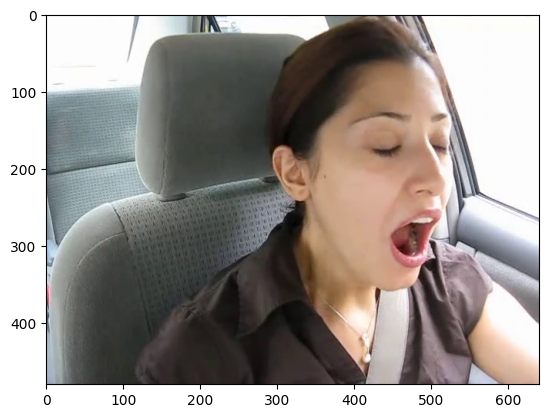

In [241]:

image = plt.imread(path_to_images+f"/yawn/{os.listdir(yawn_dataset)[0]}")
plt.imshow(image)

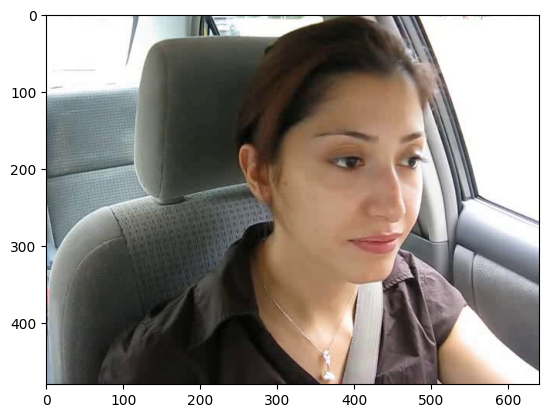

In [242]:
image = plt.imread(path_to_images+f"/no_yawn/{os.listdir(no_yawn_dataset)[0]}")
plt.imshow(image)

In [215]:
labels

'107.jpg'

In [231]:
path_link = os.path.join(path_to_images, labels[0])
os.listdir(path_link)

['1.jpg',
 '1003.jpg',
 '1004.jpg',
 '1006.jpg',
 '1007.jpg',
 '1008.jpg',
 '1009.jpg',
 '1010.jpg',
 '1021.jpg',
 '1028.jpg',
 '1029.jpg',
 '1030.jpg',
 '1031.jpg',
 '1032.jpg',
 '1033.jpg',
 '1034.jpg',
 '1038.jpg',
 '1039.jpg',
 '1042.jpg',
 '1044.jpg',
 '1046.jpg',
 '1047.jpg',
 '1050.jpg',
 '1061.jpg',
 '1062.jpg',
 '1063.jpg',
 '1067.jpg',
 '1068.jpg',
 '1069.jpg',
 '1073.jpg',
 '1074.jpg',
 '1096.jpg',
 '1097.jpg',
 '1098.jpg',
 '111.jpg',
 '1111.jpg',
 '1114.jpg',
 '1116.jpg',
 '1117.jpg',
 '1118.jpg',
 '112.jpg',
 '1120.jpg',
 '1121.jpg',
 '1122.jpg',
 '1128.jpg',
 '1129.jpg',
 '113.jpg',
 '1130.jpg',
 '1131.jpg',
 '1132.jpg',
 '1133.jpg',
 '1134.jpg',
 '1139.jpg',
 '114.jpg',
 '115.jpg',
 '117.jpg',
 '1172.jpg',
 '1173.jpg',
 '1174.jpg',
 '1176.jpg',
 '1177.jpg',
 '1178.jpg',
 '1201.jpg',
 '1202.jpg',
 '1203.jpg',
 '1208.jpg',
 '1209.jpg',
 '1210.jpg',
 '1213.jpg',
 '1214.jpg',
 '1246.jpg',
 '1247.jpg',
 '1248.jpg',
 '1250.jpg',
 '1261.jpg',
 '1266.jpg',
 '1267.jpg',
 '1268.j

In [249]:
#para yawn e not_yawn fazemos a captura apenas da face

def yawn_face():
    yaw_no = []
    IMG_SIZE = 145
    for label in labels:
        path_link = os.path.join(path_to_images, label)
        class_num1 = labels.index(label)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(haars_cascade_frontal_face)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)#detecção de varios rostos -> ajustar parametros depoi
                                                                      #testar com outros dados
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


In [248]:
yaw_no = yawn_face()
yaw_no = np.array(yaw_no)

0
[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [194 194 194]
  [178 178 178]
  [176 176 176]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [203 203 203]
  [188 188 188]
  [185 185 185]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [229 229 229]
  [219 219 219]
  [217 217 217]]

 ...

 [[180 164 147]
  [181 165 148]
  [183 163 146]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[180 164 147]
  [178 162 145]
  [183 163 146]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[180 164 147]
  [176 160 143]
  [182 162 145]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[105  98  89]
  [105  98  89]
  [105  98  89]
  ...
  [112 103 100]
  [112 103 100]
  [112 103 100]]

 [[105  98  89]
  [105  98  89]
  [105  98  89]
  ...
  [112 103 100]
  [112 103 100]
  [112 103 100]]

 [[105  98  89]
  [105  98  89]
  [105  98  89]
  ...
  [112 103 100]
  [112 103 100]
  [112 103 100]]

 ...

 [[ 16  12  11]
  [ 16  12  11]
  [ 16  12  11]
  

[[[137 128 125]
  [137 128 125]
  [137 128 125]
  ...
  [117 128 120]
  [115 126 118]
  [114 125 117]]

 [[137 128 125]
  [137 128 125]
  [137 128 125]
  ...
  [119 130 122]
  [118 129 121]
  [117 128 120]]

 [[137 128 125]
  [137 128 125]
  [137 128 125]
  ...
  [123 134 126]
  [122 133 125]
  [122 133 125]]

 ...

 [[  0   7   0]
  [100 119 100]
  [129 149 130]
  ...
  [ 34  38  27]
  [ 40  44  33]
  [ 43  47  36]]

 [[ 18  32  14]
  [125 141 123]
  [120 140 121]
  ...
  [ 28  32  21]
  [ 30  34  23]
  [ 33  37  26]]

 [[ 54  68  50]
  [132 148 130]
  [127 148 126]
  ...
  [ 45  49  38]
  [ 22  26  15]
  [  9  13   2]]]
[[[123 129 166]
  [123 129 166]
  [125 131 168]
  ...
  [110 115 124]
  [110 115 124]
  [109 114 123]]

 [[123 129 166]
  [123 129 166]
  [125 131 168]
  ...
  [110 115 124]
  [110 115 124]
  [109 114 123]]

 [[123 129 166]
  [123 129 166]
  [125 131 168]
  ...
  [110 115 124]
  [110 115 124]
  [109 114 123]]

 ...

 [[ 17  20  25]
  [ 15  18  23]
  [ 14  17  21]
  ..

[[[112 116 110]
  [112 116 110]
  [112 116 110]
  ...
  [ 58  65  68]
  [ 58  65  68]
  [ 58  65  68]]

 [[112 116 110]
  [112 116 110]
  [112 116 110]
  ...
  [ 58  65  68]
  [ 58  65  68]
  [ 58  65  68]]

 [[112 116 110]
  [112 116 110]
  [112 116 110]
  ...
  [ 58  65  68]
  [ 58  65  68]
  [ 58  65  68]]

 ...

 [[ 12   8   7]
  [ 12   8   7]
  [ 12   8   7]
  ...
  [149 165 194]
  [148 164 193]
  [147 163 192]]

 [[ 11   7   6]
  [ 11   7   6]
  [ 11   7   6]
  ...
  [148 164 193]
  [147 163 192]
  [146 162 191]]

 [[ 11   7   6]
  [ 11   7   6]
  [ 11   7   6]
  ...
  [147 163 192]
  [146 162 191]
  [145 161 190]]]
[[[114 118 112]
  [114 118 112]
  [114 118 112]
  ...
  [ 56  65  69]
  [ 56  65  69]
  [ 56  65  69]]

 [[114 118 112]
  [114 118 112]
  [114 118 112]
  ...
  [ 56  65  69]
  [ 55  64  68]
  [ 56  65  69]]

 [[114 118 112]
  [114 118 112]
  [114 118 112]
  ...
  [ 56  65  69]
  [ 55  64  68]
  [ 56  65  69]]

 ...

 [[ 11   7   6]
  [ 11   7   6]
  [ 11   7   6]
  ..

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [ 84  93 102]
  [ 84  93 102]
  [ 84  93 102]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [ 84  93 102]
  [ 84  93 102]
  [ 84  93 102]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [ 84  93 102]
  [ 84  93 102]
  [ 84  93 102]]

 ...

 [[ 20  30  37]
  [ 20  30  37]
  [ 21  29  36]
  ...
  [ 45  44  46]
  [ 45  44  46]
  [ 44  43  45]]

 [[ 20  30  37]
  [ 20  30  37]
  [ 21  29  36]
  ...
  [ 43  42  44]
  [ 43  42  44]
  [ 43  42  44]]

 [[ 20  30  37]
  [ 20  30  37]
  [ 21  29  36]
  ...
  [ 41  40  42]
  [ 41  40  42]
  [ 41  40  42]]]
[[[118 117 107]
  [118 117 107]
  [118 117 107]
  ...
  [ 69  74  72]
  [ 69  74  72]
  [ 69  74  72]]

 [[118 117 107]
  [118 117 107]
  [118 117 107]
  ...
  [ 69  74  72]
  [ 69  74  72]
  [ 69  74  72]]

 [[118 117 107]
  [118 117 107]
  [118 117 107]
  ...
  [ 69  74  72]
  [ 69  74  72]
  [ 69  74  72]]

 ...

 [[  8   5   1]
  [  8   5   1]
  [  8   5   1]
  ..

[[[127 133 122]
  [127 133 122]
  [129 133 122]
  ...
  [ 77  82  80]
  [ 76  81  79]
  [ 76  81  79]]

 [[127 133 122]
  [127 133 122]
  [129 133 122]
  ...
  [ 76  81  79]
  [ 76  81  79]
  [ 76  81  79]]

 [[129 133 122]
  [129 133 122]
  [129 133 122]
  ...
  [ 76  81  79]
  [ 76  81  79]
  [ 76  81  79]]

 ...

 [[  9   6   2]
  [  8   5   1]
  [  7   4   0]
  ...
  [129 112  91]
  [133 112  91]
  [129 108  87]]

 [[  9   6   2]
  [  8   5   1]
  [  7   4   0]
  ...
  [128 111  90]
  [132 111  90]
  [128 107  86]]

 [[  9   6   2]
  [  8   5   1]
  [  7   4   0]
  ...
  [128 111  90]
  [131 110  89]
  [127 106  85]]]
[[[188 199 197]
  [188 199 197]
  [188 199 197]
  ...
  [ 76  89  97]
  [ 76  88  98]
  [ 76  88  98]]

 [[201 212 210]
  [201 212 210]
  [201 212 210]
  ...
  [ 81  94 102]
  [ 81  93 103]
  [ 81  93 103]]

 [[201 212 210]
  [200 211 209]
  [200 211 209]
  ...
  [ 85  98 106]
  [ 86  98 108]
  [ 85  97 107]]

 ...

 [[114 131 144]
  [107 126 139]
  [103 125 137]
  ..

[[[149 153 147]
  [149 153 147]
  [149 153 147]
  ...
  [101 104 102]
  [110 113 111]
  [115 118 116]]

 [[149 153 147]
  [149 153 147]
  [149 153 147]
  ...
  [ 57  60  58]
  [ 67  70  68]
  [ 73  76  74]]

 [[149 153 147]
  [149 153 147]
  [149 153 147]
  ...
  [ 37  40  38]
  [ 37  40  38]
  [ 38  41  39]]

 ...

 [[  8   4   3]
  [  8   4   3]
  [  9   5   4]
  ...
  [214 186 185]
  [235 207 206]
  [222 194 193]]

 [[  8   4   3]
  [  8   4   3]
  [  9   5   4]
  ...
  [217 187 186]
  [237 207 206]
  [230 200 199]]

 [[  8   4   3]
  [  8   4   3]
  [  9   5   4]
  ...
  [219 189 188]
  [227 197 196]
  [220 190 189]]]
[[[149 153 147]
  [149 153 147]
  [149 153 147]
  ...
  [108 111 109]
  [114 117 115]
  [115 118 116]]

 [[149 153 147]
  [149 153 147]
  [149 153 147]
  ...
  [ 55  58  56]
  [ 66  69  67]
  [ 72  75  73]]

 [[149 153 147]
  [149 153 147]
  [149 153 147]
  ...
  [ 28  31  29]
  [ 35  38  36]
  [ 41  44  42]]

 ...

 [[  2   5   3]
  [  1   4   2]
  [  3   6   4]
  ..

[[[54 47 38]
  [54 47 38]
  [54 47 38]
  ...
  [78 80 80]
  [78 80 80]
  [78 80 80]]

 [[54 47 38]
  [54 47 38]
  [54 47 38]
  ...
  [78 80 80]
  [78 80 80]
  [78 80 80]]

 [[54 47 38]
  [54 47 38]
  [54 47 38]
  ...
  [80 80 80]
  [80 80 80]
  [80 80 80]]

 ...

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [65 61 60]
  [65 61 60]
  [65 61 60]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [64 60 59]
  [64 60 59]
  [64 60 59]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [64 60 59]
  [64 60 59]
  [64 60 59]]]
[[[56 49 40]
  [56 49 40]
  [56 49 40]
  ...
  [80 80 80]
  [80 80 80]
  [80 80 80]]

 [[56 49 40]
  [56 49 40]
  [56 49 40]
  ...
  [80 80 80]
  [80 80 80]
  [80 80 80]]

 [[56 49 40]
  [56 49 40]
  [56 49 40]
  ...
  [80 80 80]
  [80 80 80]
  [80 80 80]]

 ...

 [[ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]
  ...
  [67 63 62]
  [67 63 62]
  [66 62 61]]

 [[ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]
  ...
  [65 61 60]
  [65 61 60]
  [65 61 60]]

 [[ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]
  .

[[[ 19  16  12]
  [ 19  16  12]
  [ 19  16  12]
  ...
  [ 64  70  65]
  [ 64  70  65]
  [ 64  70  65]]

 [[ 19  16  12]
  [ 19  16  12]
  [ 19  16  12]
  ...
  [ 64  70  65]
  [ 64  70  65]
  [ 64  70  65]]

 [[ 19  16  12]
  [ 19  16  12]
  [ 19  16  12]
  ...
  [ 64  70  65]
  [ 64  70  65]
  [ 64  70  65]]

 ...

 [[186 177 173]
  [175 166 162]
  [177 168 164]
  ...
  [ 28  34  29]
  [ 28  34  29]
  [ 28  34  29]]

 [[189 180 176]
  [175 166 162]
  [171 162 158]
  ...
  [ 28  34  29]
  [ 28  34  29]
  [ 28  34  29]]

 [[188 179 175]
  [179 170 166]
  [169 160 156]
  ...
  [ 28  34  29]
  [ 28  34  29]
  [ 28  34  29]]]
[[[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [142 149 152]
  [142 149 152]
  [142 149 152]]

 [[239 239 239]
  [239 239 239]
  [239 239 239]
  ...
  [143 150 153]
  [143 150 153]
  [143 150 153]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [144 151 154]
  [144 151 154]
  [144 151 154]]

 ...

 [[202 183 178]
  [205 186 181]
  [205 186 181]
  ..

[[[ 99 106  99]
  [ 99 106  99]
  [ 99 106  99]
  ...
  [ 81  90  99]
  [ 81  90  99]
  [ 81  90  99]]

 [[ 99 106  99]
  [ 99 106  99]
  [ 99 106  99]
  ...
  [ 81  90  99]
  [ 81  90  99]
  [ 81  90  99]]

 [[ 99 106  99]
  [ 99 106  99]
  [ 99 106  99]
  ...
  [ 81  90  99]
  [ 81  90  99]
  [ 81  90  99]]

 ...

 [[ 94  95  93]
  [ 95  96  94]
  [ 97  98  96]
  ...
  [ 96  96  96]
  [ 96  96  96]
  [ 94  94  94]]

 [[ 94  95  93]
  [ 95  96  94]
  [ 97  98  96]
  ...
  [ 95  95  95]
  [ 94  94  94]
  [ 93  93  93]]

 [[ 94  95  93]
  [ 95  96  94]
  [ 96  97  95]
  ...
  [ 95  95  95]
  [ 94  94  94]
  [ 92  92  92]]]
[[[101 107  96]
  [101 107  96]
  [101 107  96]
  ...
  [ 82  88  99]
  [ 82  88  99]
  [ 82  88  99]]

 [[101 107  96]
  [101 107  96]
  [101 107  96]
  ...
  [ 82  88  99]
  [ 82  88  99]
  [ 82  88  99]]

 [[101 107  96]
  [101 107  96]
  [101 107  96]
  ...
  [ 82  88  99]
  [ 82  88  99]
  [ 82  88  99]]

 ...

 [[ 95  96  94]
  [ 96  97  95]
  [ 97  98  96]
  ..

[[[114 111 107]
  [114 111 107]
  [114 111 107]
  ...
  [113 117 112]
  [113 117 112]
  [113 117 112]]

 [[114 111 107]
  [114 111 107]
  [114 111 107]
  ...
  [113 117 112]
  [113 117 112]
  [113 117 112]]

 [[114 111 107]
  [114 111 107]
  [114 111 107]
  ...
  [113 117 112]
  [113 117 112]
  [113 117 112]]

 ...

 [[ 57  58  78]
  [ 55  56  76]
  [ 55  56  76]
  ...
  [ 28  25  21]
  [ 30  27  23]
  [ 31  28  24]]

 [[ 63  62  82]
  [ 59  58  78]
  [ 61  59  81]
  ...
  [ 41  38  34]
  [ 41  38  34]
  [ 40  37  33]]

 [[ 62  61  81]
  [ 62  61  81]
  [ 62  60  82]
  ...
  [ 64  61  57]
  [ 55  52  48]
  [ 48  45  41]]]
[[[110 111 109]
  [110 111 109]
  [110 111 109]
  ...
  [111 117 112]
  [111 117 112]
  [111 117 112]]

 [[110 111 109]
  [110 111 109]
  [110 111 109]
  ...
  [111 117 112]
  [111 117 112]
  [111 117 112]]

 [[110 111 109]
  [110 111 109]
  [110 111 109]
  ...
  [111 117 112]
  [111 117 112]
  [111 117 112]]

 ...

 [[  3   7   2]
  [  3   7   2]
  [  3   6   4]
  ..

[[[146 160 156]
  [146 160 156]
  [145 159 155]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[125 139 135]
  [125 139 135]
  [126 140 136]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[112 126 122]
  [112 126 122]
  [112 126 122]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[128 109 104]
  [128 109 104]
  [128 109 104]
  ...
  [ 88  79  70]
  [ 86  76  69]
  [ 84  75  66]]

 [[128 109 104]
  [128 109 104]
  [128 109 104]
  ...
  [ 91  81  71]
  [ 84  75  66]
  [ 84  75  65]]

 [[127 108 103]
  [127 108 103]
  [127 108 103]
  ...
  [ 93  83  73]
  [ 85  76  66]
  [ 88  79  69]]]
[[[149 158 155]
  [149 158 155]
  [151 158 155]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[132 141 138]
  [130 139 136]
  [130 137 134]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[107 116 113]
  [108 117 114]
  [111 118 115]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[126 110 103]
  [126 110 103]
  [125 109 102]
  ..

[[[28 29 25]
  [28 29 25]
  [28 29 25]
  ...
  [ 9 10  8]
  [ 8  9  7]
  [ 8  9  7]]

 [[28 29 25]
  [28 29 25]
  [28 29 25]
  ...
  [ 9 10  8]
  [ 8  9  7]
  [ 8  9  7]]

 [[28 29 25]
  [28 29 25]
  [28 29 25]
  ...
  [ 9 10  8]
  [ 8  9  7]
  [ 8  9  7]]

 ...

 [[57 45 39]
  [57 45 39]
  [58 46 40]
  ...
  [16 17 15]
  [16 17 15]
  [16 17 15]]

 [[56 44 38]
  [56 44 38]
  [57 45 39]
  ...
  [16 17 15]
  [16 17 15]
  [16 17 15]]

 [[55 43 37]
  [56 44 38]
  [56 44 38]
  ...
  [16 17 15]
  [16 17 15]
  [16 17 15]]]
[[[31 28 23]
  [31 28 23]
  [32 29 24]
  ...
  [12 13 11]
  [13 14 12]
  [14 15 13]]

 [[32 29 24]
  [32 29 24]
  [32 29 24]
  ...
  [12 13 11]
  [14 15 13]
  [14 15 13]]

 [[32 29 24]
  [32 29 24]
  [32 29 24]
  ...
  [12 13 11]
  [13 14 12]
  [14 15 13]]

 ...

 [[57 48 34]
  [57 48 34]
  [57 48 35]
  ...
  [16 17 15]
  [17 18 16]
  [17 18 16]]

 [[54 45 31]
  [55 46 32]
  [55 46 33]
  ...
  [16 17 15]
  [17 18 16]
  [17 18 16]]

 [[52 43 29]
  [53 44 30]
  [53 44 31]
  .

[[[124 130 129]
  [124 130 129]
  [124 130 129]
  ...
  [ 37  43  42]
  [ 37  43  42]
  [ 37  43  42]]

 [[125 131 130]
  [125 131 130]
  [125 131 130]
  ...
  [ 38  44  43]
  [ 38  44  43]
  [ 38  44  43]]

 [[125 131 130]
  [125 131 130]
  [125 131 130]
  ...
  [ 41  47  46]
  [ 41  47  46]
  [ 41  47  46]]

 ...

 [[144 103  88]
  [140 101  86]
  [129  94  80]
  ...
  [ 93  84  75]
  [ 93  84  75]
  [ 92  83  74]]

 [[144 103  88]
  [139 100  85]
  [128  93  79]
  ...
  [ 92  83  74]
  [ 91  82  73]
  [ 91  82  73]]

 [[143 102  87]
  [139 100  85]
  [127  92  78]
  ...
  [ 91  82  73]
  [ 91  82  73]
  [ 90  81  72]]]
[[[126 132 131]
  [126 132 131]
  [126 132 131]
  ...
  [ 38  44  43]
  [ 38  44  43]
  [ 38  44  43]]

 [[126 132 131]
  [126 132 131]
  [126 132 131]
  ...
  [ 39  45  44]
  [ 39  45  44]
  [ 39  45  44]]

 [[126 132 131]
  [126 132 131]
  [126 132 131]
  ...
  [ 41  47  46]
  [ 41  47  46]
  [ 41  47  46]]

 ...

 [[139 104  90]
  [130  97  82]
  [126  94  81]
  ..

[[[117 119 113]
  [117 119 113]
  [117 119 113]
  ...
  [ 75  83  83]
  [ 75  83  83]
  [ 75  83  83]]

 [[117 119 113]
  [117 119 113]
  [117 119 113]
  ...
  [ 75  83  83]
  [ 75  83  83]
  [ 75  83  83]]

 [[117 119 113]
  [117 119 113]
  [117 119 113]
  ...
  [ 75  83  83]
  [ 75  83  83]
  [ 75  83  83]]

 ...

 [[ 69  41  30]
  [ 63  37  25]
  [ 55  31  19]
  ...
  [181 147 153]
  [180 148 153]
  [180 148 153]]

 [[ 57  35  23]
  [ 49  27  15]
  [ 42  23  10]
  ...
  [178 146 151]
  [179 145 151]
  [179 145 151]]

 [[ 58  39  26]
  [ 47  30  17]
  [ 40  23  10]
  ...
  [174 144 149]
  [178 144 150]
  [181 145 151]]]
[[[116 118 112]
  [116 118 112]
  [116 118 112]
  ...
  [ 71  81  81]
  [ 71  81  81]
  [ 71  81  81]]

 [[116 118 112]
  [116 118 112]
  [116 118 112]
  ...
  [ 71  81  81]
  [ 71  81  81]
  [ 71  81  81]]

 [[116 118 112]
  [116 118 112]
  [116 118 112]
  ...
  [ 71  81  81]
  [ 71  81  81]
  [ 71  81  81]]

 ...

 [[ 55  36  28]
  [ 51  34  25]
  [ 47  32  23]
  ..

[[[250 253 251]
  [250 253 251]
  [250 253 251]
  ...
  [107 168 112]
  [ 75 137  83]
  [ 89 151  97]]

 [[250 253 251]
  [250 253 251]
  [250 253 251]
  ...
  [125 186 130]
  [ 93 155 101]
  [ 83 145  91]]

 [[250 253 251]
  [250 253 251]
  [250 253 251]
  ...
  [113 175 121]
  [ 96 158 106]
  [ 97 159 107]]

 ...

 [[177 183 196]
  [177 183 196]
  [177 183 196]
  ...
  [ 96  71  91]
  [ 99  74  94]
  [100  75  95]]

 [[180 183 197]
  [180 183 197]
  [180 183 197]
  ...
  [ 97  72  92]
  [ 97  72  92]
  [101  76  96]]

 [[180 183 197]
  [180 183 197]
  [180 183 197]
  ...
  [ 98  73  93]
  [ 97  72  92]
  [101  76  96]]]
[[[249 252 250]
  [249 252 250]
  [249 252 250]
  ...
  [101 160 110]
  [ 79 139  91]
  [ 88 148 100]]

 [[249 252 250]
  [249 252 250]
  [249 252 250]
  ...
  [119 180 130]
  [ 90 150 102]
  [103 163 115]]

 [[249 252 250]
  [249 252 250]
  [249 252 250]
  ...
  [122 184 136]
  [ 87 149 101]
  [ 83 145  97]]

 ...

 [[175 181 194]
  [173 181 194]
  [175 181 194]
  ..

[[[242 247 246]
  [242 247 246]
  [242 247 246]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[242 247 246]
  [242 247 246]
  [242 247 246]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[243 248 247]
  [243 248 247]
  [242 247 246]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[240 254 252]
  [243 255 255]
  [239 253 251]
  ...
  [ 82  66  53]
  [ 82  66  53]
  [ 82  66  53]]

 [[239 253 251]
  [243 255 255]
  [239 253 251]
  ...
  [ 82  66  53]
  [ 82  66  53]
  [ 82  66  53]]

 [[238 252 250]
  [243 255 255]
  [239 253 251]
  ...
  [ 82  66  53]
  [ 82  66  53]
  [ 82  66  53]]]
[[[247 250 248]
  [247 250 248]
  [247 250 248]
  ...
  [250 253 251]
  [250 253 251]
  [250 253 251]]

 [[247 250 248]
  [247 250 248]
  [247 250 248]
  ...
  [250 253 251]
  [250 253 251]
  [250 253 251]]

 [[247 250 248]
  [247 250 248]
  [247 250 248]
  ...
  [250 253 251]
  [250 253 251]
  [250 253 251]]

 ...

 [[247 255 255]
  [247 255 255]
  [248 255 255]
  ..

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [163 164 168]
  [165 166 170]
  [165 166 170]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [178 179 183]
  [179 178 182]
  [177 178 182]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [189 188 192]
  [189 185 190]
  [187 186 190]]

 ...

 [[241 243 255]
  [192 193 214]
  [153 151 181]
  ...
  [102 110 110]
  [103 111 111]
  [101 109 109]]

 [[242 244 255]
  [186 187 208]
  [155 153 182]
  ...
  [ 98 106 106]
  [ 99 107 107]
  [103 111 111]]

 [[242 244 255]
  [180 181 202]
  [156 154 183]
  ...
  [ 97 105 105]
  [ 96 104 104]
  [103 111 111]]]
[[[214 211 207]
  [214 211 207]
  [215 212 208]
  ...
  [128 134 139]
  [129 135 140]
  [130 136 141]]

 [[217 214 210]
  [216 213 209]
  [216 213 209]
  ...
  [128 134 139]
  [129 135 140]
  [130 136 141]]

 [[218 215 211]
  [217 214 210]
  [217 214 210]
  ...
  [127 133 138]
  [128 135 138]
  [129 136 139]]

 ...

 [[ 96  97 107]
  [ 83  85  95]
  [ 92  94 104]
  ..

[[[221 225 220]
  [222 226 221]
  [222 228 223]
  ...
  [198 193 184]
  [196 194 184]
  [192 190 180]]

 [[228 232 227]
  [229 233 228]
  [229 235 230]
  ...
  [202 197 188]
  [200 198 188]
  [201 199 189]]

 [[232 236 231]
  [233 237 232]
  [233 239 234]
  ...
  [197 194 186]
  [202 196 189]
  [206 200 193]]

 ...

 [[228 232 243]
  [225 227 245]
  [212 212 242]
  ...
  [ 81 105 129]
  [ 81 105 129]
  [ 81 105 129]]

 [[233 235 253]
  [230 230 254]
  [210 208 244]
  ...
  [ 81 105 129]
  [ 81 105 129]
  [ 81 105 129]]

 [[240 241 255]
  [237 236 255]
  [222 219 255]
  ...
  [ 80 104 128]
  [ 80 104 128]
  [ 80 104 128]]]
[[[215 230 226]
  [214 229 225]
  [213 228 224]
  ...
  [202 187 184]
  [206 189 186]
  [206 189 186]]

 [[221 236 232]
  [221 236 232]
  [221 236 232]
  ...
  [206 194 190]
  [210 195 192]
  [213 198 195]]

 [[223 237 233]
  [225 239 235]
  [225 240 236]
  ...
  [208 196 194]
  [207 194 192]
  [207 194 192]]

 ...

 [[232 233 247]
  [225 226 246]
  [215 214 246]
  ..

[[[112 123 120]
  [112 123 120]
  [112 123 120]
  ...
  [ 87  94 103]
  [ 87  94 103]
  [ 87  94 103]]

 [[112 123 120]
  [112 123 120]
  [112 123 120]
  ...
  [ 87  94 103]
  [ 87  94 103]
  [ 87  94 103]]

 [[112 123 120]
  [112 123 120]
  [112 123 120]
  ...
  [ 87  94 103]
  [ 87  94 103]
  [ 87  94 103]]

 ...

 [[ 40  46  65]
  [ 33  40  55]
  [ 27  34  37]
  ...
  [233 243 253]
  [197 206 219]
  [145 154 167]]

 [[ 30  37  54]
  [ 26  35  45]
  [ 23  31  31]
  ...
  [243 254 255]
  [228 238 248]
  [202 211 224]]

 [[ 23  30  45]
  [ 21  30  39]
  [ 21  29  29]
  ...
  [242 253 255]
  [226 236 246]
  [226 235 248]]]
[[[111 124 122]
  [111 124 122]
  [111 124 122]
  ...
  [ 87  94 103]
  [ 87  94 103]
  [ 87  94 103]]

 [[111 124 122]
  [111 124 122]
  [111 124 122]
  ...
  [ 89  96 105]
  [ 89  96 105]
  [ 89  96 105]]

 [[111 124 122]
  [111 124 122]
  [111 124 122]
  ...
  [ 91  98 107]
  [ 91  98 107]
  [ 91  98 107]]

 ...

 [[ 34  46  64]
  [ 24  35  49]
  [ 24  32  39]
  ..

[[[ 32  34  28]
  [ 32  34  28]
  [ 32  34  28]
  ...
  [ 75  66  56]
  [ 75  66  56]
  [ 75  66  56]]

 [[ 32  34  28]
  [ 32  34  28]
  [ 32  34  28]
  ...
  [ 76  67  57]
  [ 76  67  57]
  [ 76  67  57]]

 [[ 32  34  28]
  [ 32  34  28]
  [ 32  34  28]
  ...
  [ 76  67  57]
  [ 76  67  57]
  [ 76  67  57]]

 ...

 [[151 108  35]
  [152 109  36]
  [154 111  38]
  ...
  [ 54  49  46]
  [ 54  49  46]
  [ 54  49  46]]

 [[152 109  36]
  [153 110  37]
  [154 111  38]
  ...
  [ 54  49  46]
  [ 54  49  46]
  [ 54  49  46]]

 [[155 112  39]
  [155 112  39]
  [156 113  40]
  ...
  [ 54  49  46]
  [ 54  49  46]
  [ 54  49  46]]]
[[[ 96 104 103]
  [ 96 104 103]
  [ 96 104 103]
  ...
  [224 232 231]
  [224 232 231]
  [224 232 231]]

 [[ 96 104 103]
  [ 96 104 103]
  [ 96 104 103]
  ...
  [227 235 234]
  [227 235 234]
  [227 235 234]]

 [[ 96 104 103]
  [ 96 104 103]
  [ 96 104 103]
  ...
  [229 237 236]
  [229 237 236]
  [229 237 236]]

 ...

 [[ 35  30  27]
  [ 38  33  30]
  [ 42  37  34]
  ..

[[[194 206 194]
  [189 201 189]
  [206 218 206]
  ...
  [161 148 134]
  [163 147 134]
  [169 152 139]]

 [[194 206 194]
  [195 207 195]
  [212 224 212]
  ...
  [179 168 154]
  [185 169 157]
  [189 172 159]]

 [[186 198 186]
  [194 206 194]
  [214 226 214]
  ...
  [182 170 158]
  [187 170 161]
  [185 169 157]]

 ...

 [[235 227 255]
  [237 229 255]
  [228 219 252]
  ...
  [ 62  79  92]
  [ 62  79  92]
  [ 62  79  92]]

 [[232 225 252]
  [228 220 250]
  [223 214 247]
  ...
  [ 62  79  92]
  [ 62  79  92]
  [ 62  79  92]]

 [[216 209 236]
  [220 212 242]
  [231 222 255]
  ...
  [ 62  79  92]
  [ 62  79  92]
  [ 62  79  92]]]
[[[186 198 186]
  [196 208 196]
  [199 211 199]
  ...
  [164 148 135]
  [168 152 139]
  [173 157 144]]

 [[187 199 187]
  [200 212 200]
  [206 218 206]
  ...
  [176 163 149]
  [180 166 154]
  [184 171 157]]

 [[182 194 182]
  [200 212 200]
  [210 222 210]
  ...
  [178 169 156]
  [180 170 160]
  [183 174 161]]

 ...

 [[225 223 252]
  [231 229 255]
  [224 220 249]
  ..

[[[108 118 118]
  [108 118 118]
  [108 118 118]
  ...
  [ 79  87  87]
  [ 79  87  87]
  [ 79  87  87]]

 [[108 118 118]
  [108 118 118]
  [108 118 118]
  ...
  [ 79  87  87]
  [ 79  87  87]
  [ 79  87  87]]

 [[108 118 118]
  [108 118 118]
  [108 118 118]
  ...
  [ 79  87  87]
  [ 79  87  87]
  [ 79  87  87]]

 ...

 [[ 44  40  39]
  [ 44  40  39]
  [ 44  40  39]
  ...
  [ 51  46  45]
  [ 51  46  45]
  [ 52  47  46]]

 [[ 44  40  39]
  [ 44  40  39]
  [ 44  40  39]
  ...
  [ 50  45  44]
  [ 50  45  44]
  [ 50  45  44]]

 [[ 44  40  39]
  [ 44  40  39]
  [ 44  40  39]
  ...
  [ 50  45  44]
  [ 50  45  44]
  [ 50  45  44]]]
[[[111 119 118]
  [111 119 118]
  [111 119 118]
  ...
  [ 79  87  87]
  [ 79  87  87]
  [ 79  87  87]]

 [[111 119 118]
  [111 119 118]
  [111 119 118]
  ...
  [ 79  87  87]
  [ 79  87  87]
  [ 79  87  87]]

 [[111 119 118]
  [111 119 118]
  [111 119 118]
  ...
  [ 79  87  87]
  [ 79  87  87]
  [ 79  87  87]]

 ...

 [[ 45  40  39]
  [ 45  40  39]
  [ 45  40  39]
  ..

[[[49 50 48]
  [49 50 48]
  [49 50 48]
  ...
  [66 66 66]
  [66 66 66]
  [66 66 66]]

 [[49 50 48]
  [49 50 48]
  [49 50 48]
  ...
  [66 66 66]
  [66 66 66]
  [66 66 66]]

 [[49 50 48]
  [49 50 48]
  [49 50 48]
  ...
  [66 66 66]
  [66 66 66]
  [66 66 66]]

 ...

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [74 70 69]
  [75 71 70]
  [75 71 70]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [73 69 68]
  [74 70 69]
  [74 70 69]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [72 68 67]
  [73 69 68]
  [73 69 68]]]
[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 251 252]
  [255 251 252]
  [255 251 252]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 251 252]
  [255 251 252]
  [255 251 252]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 253 253]
  [255 253 253]
  [255 253 253]]

 ...

 [[ 96  47 115]
  [ 96  47 115]
  [ 96  47 115]
  ...
  [ 96  79  76]
  [ 95  78  75]
  [ 89  72  69]]

 [[ 96  47 115]
  [ 96  47 115]
  [ 96  47 115]
  ...
  

[[[221 223 217]
  [217 219 213]
  [220 222 216]
  ...
  [158 177 182]
  [151 170 175]
  [162 181 186]]

 [[225 227 221]
  [224 226 220]
  [227 229 223]
  ...
  [203 228 230]
  [197 222 224]
  [185 210 212]]

 [[227 229 223]
  [232 234 228]
  [234 236 230]
  ...
  [190 229 227]
  [198 237 235]
  [200 239 237]]

 ...

 [[196 197 195]
  [196 197 195]
  [196 197 195]
  ...
  [ 91  87  86]
  [ 91  87  86]
  [ 91  87  86]]

 [[193 194 192]
  [193 194 192]
  [193 194 192]
  ...
  [ 90  86  85]
  [ 91  87  86]
  [ 91  87  86]]

 [[192 193 191]
  [192 193 191]
  [192 193 191]
  ...
  [ 90  86  85]
  [ 90  86  85]
  [ 90  86  85]]]
[[[234 236 230]
  [226 228 222]
  [224 226 220]
  ...
  [160 176 175]
  [166 182 181]
  [155 171 170]]

 [[230 232 226]
  [227 229 223]
  [227 229 223]
  ...
  [207 229 227]
  [210 232 230]
  [189 211 209]]

 [[227 229 223]
  [231 233 227]
  [233 235 229]
  ...
  [201 237 231]
  [203 239 233]
  [204 240 234]]

 ...

 [[195 196 194]
  [195 196 194]
  [195 196 194]
  ..

[[[250 253 251]
  [250 253 251]
  [250 253 251]
  ...
  [250 253 251]
  [250 253 251]
  [250 253 251]]

 [[250 253 251]
  [250 253 251]
  [250 253 251]
  ...
  [250 253 251]
  [250 253 251]
  [250 253 251]]

 [[250 253 251]
  [250 253 251]
  [250 253 251]
  ...
  [250 253 251]
  [250 253 251]
  [250 253 251]]

 ...

 [[108  42 113]
  [106  43 113]
  [106  43 113]
  ...
  [105  96  83]
  [104  92  80]
  [107  95  83]]

 [[107  41 112]
  [105  42 112]
  [104  41 111]
  ...
  [105  95  85]
  [107  98  85]
  [106  97  84]]

 [[105  39 110]
  [103  40 110]
  [103  40 110]
  ...
  [ 93  83  73]
  [ 98  89  76]
  [101  92  79]]]
[[[250 253 251]
  [250 253 251]
  [250 253 251]
  ...
  [248 252 253]
  [248 252 253]
  [248 252 253]]

 [[250 253 251]
  [250 253 251]
  [250 253 251]
  ...
  [248 252 253]
  [248 252 253]
  [248 252 253]]

 [[250 253 251]
  [250 253 251]
  [250 253 251]
  ...
  [248 252 253]
  [248 252 253]
  [248 252 253]]

 ...

 [[ 95  44 112]
  [ 95  44 112]
  [ 95  44 112]
  ..

[[[129 118 114]
  [129 118 114]
  [129 118 114]
  ...
  [138 149 153]
  [138 149 153]
  [138 149 153]]

 [[141 130 126]
  [139 128 124]
  [136 125 121]
  ...
  [138 149 153]
  [138 149 153]
  [138 149 153]]

 [[132 119 117]
  [133 120 118]
  [135 122 120]
  ...
  [138 149 153]
  [138 149 153]
  [138 149 153]]

 ...

 [[131 107 101]
  [127 105  99]
  [119 101  94]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[131 107 101]
  [127 105  99]
  [119 101  94]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[131 107 101]
  [127 105  99]
  [118 100  93]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[120 116 111]
  [121 117 112]
  [121 117 112]
  ...
  [139 150 154]
  [139 150 154]
  [139 150 154]]

 [[140 134 129]
  [140 134 129]
  [139 133 128]
  ...
  [139 150 154]
  [139 150 154]
  [139 150 154]]

 [[130 121 118]
  [130 121 118]
  [128 119 116]
  ...
  [139 150 154]
  [139 150 154]
  [139 150 154]]

 ...

 [[128 109 104]
  [120 101  96]
  [112  96  90]
  ..

[[[247 250 248]
  [247 250 248]
  [247 250 248]
  ...
  [208 210 191]
  [203 205 186]
  [215 217 198]]

 [[247 250 248]
  [247 250 248]
  [247 250 248]
  ...
  [226 228 209]
  [223 225 206]
  [227 229 210]]

 [[247 250 248]
  [247 250 248]
  [247 250 248]
  ...
  [225 227 208]
  [221 223 204]
  [225 227 208]]

 ...

 [[163 168 183]
  [163 168 183]
  [162 167 182]
  ...
  [162 170 199]
  [171 179 208]
  [167 175 204]]

 [[161 164 179]
  [161 164 179]
  [161 164 179]
  ...
  [167 175 204]
  [165 171 200]
  [166 172 201]]

 [[158 161 176]
  [158 161 176]
  [158 161 176]
  ...
  [171 179 208]
  [168 174 203]
  [166 172 201]]]
[[[250 253 251]
  [250 253 251]
  [250 253 251]
  ...
  [223 231 214]
  [213 221 204]
  [210 218 201]]

 [[250 253 251]
  [250 253 251]
  [250 253 251]
  ...
  [233 241 224]
  [228 236 219]
  [229 237 220]]

 [[250 253 251]
  [250 253 251]
  [250 253 251]
  ...
  [232 240 223]
  [227 235 218]
  [227 235 218]]

 ...

 [[172 177 192]
  [172 177 192]
  [172 177 192]
  ..

[[[226 234 241]
  [226 234 241]
  [226 234 241]
  ...
  [109 117 124]
  [109 117 124]
  [109 117 124]]

 [[226 234 241]
  [226 234 241]
  [226 234 241]
  ...
  [109 117 124]
  [109 117 124]
  [109 117 124]]

 [[226 234 241]
  [226 234 241]
  [226 234 241]
  ...
  [109 117 124]
  [109 117 124]
  [109 117 124]]

 ...

 [[  8   8   8]
  [  8   8   8]
  [  8   8   8]
  ...
  [255 207 157]
  [240 185 140]
  [216 161 118]]

 [[  8   8   8]
  [  8   8   8]
  [  8   8   8]
  ...
  [255 213 162]
  [246 194 147]
  [216 161 116]]

 [[  8   8   8]
  [  8   8   8]
  [  8   8   8]
  ...
  [255 214 163]
  [255 205 158]
  [219 164 119]]]
[[[227 237 237]
  [227 237 237]
  [227 237 237]
  ...
  [112 120 120]
  [112 120 120]
  [112 120 120]]

 [[227 237 237]
  [227 237 237]
  [227 237 237]
  ...
  [112 120 120]
  [112 120 120]
  [112 120 120]]

 [[227 237 237]
  [227 237 237]
  [227 237 237]
  ...
  [112 120 120]
  [112 120 120]
  [112 120 120]]

 ...

 [[ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]
  ..

[[[192 189 184]
  [192 189 184]
  [192 189 184]
  ...
  [111 107 113]
  [114 106 116]
  [110 102 112]]

 [[202 199 194]
  [202 199 194]
  [202 199 194]
  ...
  [121 117 123]
  [123 115 125]
  [119 111 121]]

 [[204 201 196]
  [204 201 196]
  [204 201 196]
  ...
  [132 126 131]
  [131 123 130]
  [129 121 128]]

 ...

 [[188 179 176]
  [188 179 176]
  [188 179 176]
  ...
  [204 179 175]
  [194 169 165]
  [191 166 162]]

 [[187 178 175]
  [187 178 175]
  [187 178 175]
  ...
  [199 174 170]
  [196 171 167]
  [194 169 165]]

 [[186 177 174]
  [186 177 174]
  [186 177 174]
  ...
  [192 167 163]
  [197 172 168]
  [197 172 168]]]
[[[ 89 107 160]
  [ 89 107 160]
  [ 89 107 160]
  ...
  [108 105 101]
  [112 105 102]
  [115 108 105]]

 [[ 89 107 160]
  [ 89 107 160]
  [ 90 108 161]
  ...
  [117 114 110]
  [120 113 110]
  [123 116 113]]

 [[ 92 108 161]
  [ 93 109 162]
  [ 94 110 163]
  ...
  [128 125 121]
  [130 123 120]
  [126 119 116]]

 ...

 [[177 180 178]
  [177 180 178]
  [177 180 178]
  ..

[[[165 183 170]
  [165 183 170]
  [165 183 170]
  ...
  [115 182 167]
  [108 183 167]
  [100 180 163]]

 [[161 179 166]
  [161 179 166]
  [161 179 166]
  ...
  [130 197 182]
  [121 194 178]
  [118 196 179]]

 [[155 173 160]
  [155 173 160]
  [155 173 160]
  ...
  [126 191 176]
  [121 192 176]
  [120 195 179]]

 ...

 [[173 128  54]
  [173 128  54]
  [173 128  54]
  ...
  [163 172 209]
  [159 168 205]
  [155 164 201]]

 [[173 128  54]
  [172 127  53]
  [172 127  53]
  ...
  [167 176 214]
  [167 176 214]
  [168 177 215]]

 [[173 128  54]
  [172 127  53]
  [172 127  53]
  ...
  [152 161 199]
  [148 157 195]
  [147 156 194]]]
[[[125 145 133]
  [124 144 132]
  [122 142 130]
  ...
  [110 183 167]
  [101 181 164]
  [103 185 167]]

 [[195 215 203]
  [195 215 203]
  [194 214 202]
  ...
  [117 190 174]
  [115 193 176]
  [109 189 172]]

 [[196 213 202]
  [198 215 204]
  [201 218 207]
  ...
  [115 186 170]
  [114 189 173]
  [110 188 171]]

 ...

 [[186 147  72]
  [187 148  73]
  [189 150  75]
  ..

[[[ 31  35  30]
  [ 31  35  30]
  [ 31  35  30]
  ...
  [ 54  61  64]
  [ 54  61  64]
  [ 54  61  64]]

 [[ 31  35  30]
  [ 31  35  30]
  [ 31  35  30]
  ...
  [ 54  61  64]
  [ 54  61  64]
  [ 54  61  64]]

 [[ 31  35  30]
  [ 31  35  30]
  [ 31  35  30]
  ...
  [ 54  61  64]
  [ 54  61  64]
  [ 54  61  64]]

 ...

 [[141 130 126]
  [141 130 126]
  [141 130 126]
  ...
  [ 29  34  33]
  [ 29  34  33]
  [ 29  34  33]]

 [[141 130 126]
  [140 129 125]
  [140 129 125]
  ...
  [ 29  34  33]
  [ 29  34  33]
  [ 29  34  33]]

 [[140 129 125]
  [140 129 125]
  [140 129 125]
  ...
  [ 29  34  33]
  [ 29  34  33]
  [ 29  34  33]]]
[[[ 31  34  32]
  [ 31  34  32]
  [ 31  34  32]
  ...
  [ 54  61  64]
  [ 54  61  64]
  [ 54  61  64]]

 [[ 31  34  32]
  [ 31  34  32]
  [ 31  34  32]
  ...
  [ 54  61  64]
  [ 54  61  64]
  [ 54  61  64]]

 [[ 31  34  32]
  [ 31  34  32]
  [ 31  34  32]
  ...
  [ 54  61  64]
  [ 54  61  64]
  [ 54  61  64]]

 ...

 [[141 129 127]
  [141 129 127]
  [141 129 127]
  ..

[[[ 49  50  46]
  [ 49  50  46]
  [ 49  50  46]
  ...
  [ 52  57  72]
  [ 52  57  72]
  [ 52  57  72]]

 [[ 49  50  46]
  [ 49  50  46]
  [ 49  50  46]
  ...
  [ 52  57  72]
  [ 52  57  72]
  [ 52  57  72]]

 [[ 49  50  46]
  [ 49  50  46]
  [ 49  50  46]
  ...
  [ 52  57  72]
  [ 52  57  72]
  [ 52  57  72]]

 ...

 [[ 61  47  95]
  [ 62  47  98]
  [ 63  47 100]
  ...
  [ 29  30  40]
  [ 29  30  40]
  [ 29  30  40]]

 [[ 61  47  95]
  [ 62  47  98]
  [ 63  47 100]
  ...
  [ 29  30  40]
  [ 29  30  40]
  [ 29  30  40]]

 [[ 61  47  95]
  [ 62  47  98]
  [ 63  47 100]
  ...
  [ 29  30  40]
  [ 29  30  40]
  [ 29  30  40]]]
[[[ 47  48  46]
  [ 45  46  44]
  [ 46  47  45]
  ...
  [ 54  59  74]
  [ 54  59  74]
  [ 54  59  74]]

 [[ 48  49  47]
  [ 46  47  45]
  [ 46  47  45]
  ...
  [ 54  59  74]
  [ 54  59  74]
  [ 54  59  74]]

 [[ 48  49  47]
  [ 47  48  46]
  [ 47  48  46]
  ...
  [ 54  59  74]
  [ 54  59  74]
  [ 54  59  74]]

 ...

 [[ 61  43 110]
  [ 62  44 111]
  [ 63  44 113]
  ..

[[[ 98  87  67]
  [ 98  87  67]
  [100  86  67]
  ...
  [ 97  80  71]
  [ 97  80  71]
  [ 97  80  71]]

 [[ 99  88  68]
  [ 99  88  68]
  [101  87  68]
  ...
  [ 97  80  71]
  [ 97  80  71]
  [ 97  80  71]]

 [[104  90  71]
  [103  89  70]
  [103  89  70]
  ...
  [ 97  80  71]
  [ 97  80  71]
  [ 97  80  71]]

 ...

 [[  2  11   8]
  [  3  12   9]
  [  3  12   9]
  ...
  [ 82  73  63]
  [ 82  73  63]
  [ 82  73  63]]

 [[  3  11  11]
  [  4  12  12]
  [  3  11  10]
  ...
  [ 80  71  61]
  [ 80  71  61]
  [ 80  71  61]]

 [[  4  11  14]
  [  4  12  12]
  [  4  12  12]
  ...
  [ 79  70  60]
  [ 79  70  60]
  [ 79  70  60]]]
[[[96 89 74]
  [96 89 74]
  [96 89 74]
  ...
  [94 85 76]
  [94 85 76]
  [94 85 76]]

 [[96 89 74]
  [96 89 74]
  [96 89 74]
  ...
  [94 85 76]
  [94 85 76]
  [94 85 76]]

 [[96 89 74]
  [96 89 74]
  [96 89 74]
  ...
  [94 85 76]
  [94 85 76]
  [94 85 76]]

 ...

 [[17 15 15]
  [16 14 14]
  [17 14 16]
  ...
  [80 71 67]
  [80 71 67]
  [80 71 67]]

 [[18 14 13]
  [18 1

[[[79 89 83]
  [79 89 83]
  [79 89 83]
  ...
  [55 61 98]
  [55 61 98]
  [55 61 98]]

 [[79 89 83]
  [79 89 83]
  [79 89 83]
  ...
  [55 61 98]
  [55 61 98]
  [55 61 98]]

 [[79 89 83]
  [79 89 83]
  [79 89 83]
  ...
  [55 61 98]
  [55 61 98]
  [55 61 98]]

 ...

 [[83 80 75]
  [89 86 81]
  [86 83 78]
  ...
  [38 35 90]
  [37 37 85]
  [35 36 80]]

 [[82 79 74]
  [67 64 59]
  [57 54 49]
  ...
  [38 35 90]
  [37 37 83]
  [35 37 78]]

 [[54 51 46]
  [60 57 52]
  [63 60 55]
  ...
  [37 34 89]
  [37 37 83]
  [34 36 77]]]
[[[124 145 143]
  [124 145 143]
  [124 145 143]
  ...
  [128 141 149]
  [128 141 149]
  [128 141 149]]

 [[124 145 143]
  [124 145 143]
  [124 145 143]
  ...
  [127 140 148]
  [127 140 148]
  [127 140 148]]

 [[125 146 144]
  [125 146 144]
  [125 146 144]
  ...
  [125 138 146]
  [125 138 146]
  [125 138 146]]

 ...

 [[ 10  11   9]
  [ 10  11   9]
  [ 10  11   9]
  ...
  [ 92  83  73]
  [ 92  83  73]
  [ 92  83  73]]

 [[ 10  11   9]
  [ 10  11   9]
  [ 10  11   9]
  ...
  

[[[71 81 81]
  [71 81 81]
  [71 81 81]
  ...
  [62 62 62]
  [62 62 62]
  [62 62 62]]

 [[71 81 81]
  [71 81 81]
  [71 81 81]
  ...
  [62 62 62]
  [62 62 62]
  [62 62 62]]

 [[71 81 81]
  [71 81 81]
  [71 81 81]
  ...
  [62 62 62]
  [62 62 62]
  [62 62 62]]

 ...

 [[ 5  8  6]
  [ 5  8  6]
  [ 5  8  6]
  ...
  [67 60 51]
  [67 60 51]
  [67 60 51]]

 [[ 5  8  6]
  [ 5  8  6]
  [ 5  8  6]
  ...
  [66 59 50]
  [66 59 50]
  [66 59 50]]

 [[ 5  8  6]
  [ 5  8  6]
  [ 5  8  6]
  ...
  [66 59 50]
  [66 59 50]
  [66 59 50]]]
[[[73 81 81]
  [73 81 81]
  [73 81 81]
  ...
  [60 61 59]
  [60 61 59]
  [60 61 59]]

 [[73 81 81]
  [73 81 81]
  [73 81 81]
  ...
  [60 61 59]
  [60 61 59]
  [60 61 59]]

 [[73 81 81]
  [73 81 81]
  [73 81 81]
  ...
  [60 61 59]
  [60 61 59]
  [60 61 59]]

 ...

 [[ 3  6  4]
  [ 3  6  4]
  [ 1  6  4]
  ...
  [70 61 52]
  [70 61 52]
  [70 61 52]]

 [[ 1  6  4]
  [ 1  6  4]
  [ 1  6  4]
  ...
  [70 61 52]
  [70 61 52]
  [70 61 52]]

 [[ 0  5  3]
  [ 1  6  4]
  [ 1  6  4]
  .

[[[254 252 251]
  [255 253 252]
  [255 254 253]
  ...
  [157 197 162]
  [187 226 194]
  [167 206 174]]

 [[255 251 250]
  [255 251 250]
  [255 252 251]
  ...
  [167 206 174]
  [147 186 154]
  [155 194 162]]

 [[255 253 252]
  [255 253 252]
  [255 253 252]
  ...
  [153 194 162]
  [141 182 151]
  [200 241 210]]

 ...

 [[  5   6   4]
  [  7   8   6]
  [  8   9   7]
  ...
  [ 77  69  56]
  [ 77  69  56]
  [ 77  69  56]]

 [[  5   6   2]
  [  7   8   4]
  [  8   9   7]
  ...
  [ 76  68  55]
  [ 76  68  55]
  [ 76  68  55]]

 [[  6   7   3]
  [  7   8   4]
  [  8   9   7]
  ...
  [ 75  67  54]
  [ 75  67  54]
  [ 75  67  54]]]
[[[255 251 252]
  [255 250 251]
  [255 250 251]
  ...
  [144 187 178]
  [174 211 207]
  [156 193 189]]

 [[255 253 254]
  [255 252 253]
  [255 252 253]
  ...
  [158 203 194]
  [142 183 176]
  [156 197 190]]

 [[255 252 251]
  [255 252 251]
  [255 252 251]
  ...
  [130 180 170]
  [136 181 172]
  [190 235 226]]

 ...

 [[  3   8   7]
  [  3   8   7]
  [  6   8   8]
  ..

[[[254 254 254]
  [253 253 253]
  [252 252 252]
  ...
  [147 205 187]
  [131 175 162]
  [160 200 188]]

 [[251 251 251]
  [253 253 253]
  [254 254 254]
  ...
  [174 232 214]
  [191 240 226]
  [167 210 197]]

 [[254 252 251]
  [255 254 253]
  [255 255 254]
  ...
  [151 213 195]
  [195 248 234]
  [155 204 190]]

 ...

 [[  9   9   9]
  [  9   9   9]
  [  9   9   9]
  ...
  [ 70  71  67]
  [ 71  73  67]
  [ 71  73  67]]

 [[  9   9   9]
  [  9   9   9]
  [  9   9   9]
  ...
  [ 68  69  65]
  [ 69  71  65]
  [ 70  72  66]]

 [[  9   9   9]
  [  9   9   9]
  [  9   9   9]
  ...
  [ 68  69  65]
  [ 69  71  65]
  [ 69  71  65]]]
[[[255 254 254]
  [255 254 254]
  [255 254 254]
  ...
  [158 214 195]
  [137 182 166]
  [157 198 183]]

 [[253 251 251]
  [253 251 251]
  [253 251 251]
  ...
  [173 229 210]
  [184 231 215]
  [158 201 186]]

 [[255 255 254]
  [255 255 254]
  [255 255 254]
  ...
  [153 213 195]
  [193 245 228]
  [151 198 182]]

 ...

 [[  6   6   6]
  [  6   6   6]
  [  6   6   6]
  ..

[[[ 36  42  31]
  [ 46  52  41]
  [ 50  56  45]
  ...
  [ 55  61  60]
  [ 55  61  60]
  [ 55  61  60]]

 [[ 90  96  85]
  [ 81  87  76]
  [ 72  78  67]
  ...
  [ 55  61  60]
  [ 55  61  60]
  [ 55  61  60]]

 [[181 187 176]
  [175 181 170]
  [165 171 160]
  ...
  [ 55  61  60]
  [ 55  61  60]
  [ 55  61  60]]

 ...

 [[  5   5   5]
  [  5   5   5]
  [  5   5   5]
  ...
  [ 42  39  35]
  [ 42  39  35]
  [ 42  39  35]]

 [[  5   5   5]
  [  5   5   5]
  [  5   5   5]
  ...
  [ 41  38  34]
  [ 41  38  34]
  [ 41  38  34]]

 [[  5   5   5]
  [  5   5   5]
  [  5   5   5]
  ...
  [ 40  37  33]
  [ 40  37  33]
  [ 40  37  33]]]
[[[ 55  56  40]
  [ 45  46  30]
  [ 43  44  28]
  ...
  [ 54  62  62]
  [ 54  62  62]
  [ 54  62  62]]

 [[ 91  92  76]
  [ 83  86  70]
  [ 77  78  62]
  ...
  [ 54  62  62]
  [ 54  62  62]
  [ 54  62  62]]

 [[185 188 172]
  [182 188 171]
  [171 174 158]
  ...
  [ 54  62  62]
  [ 54  62  62]
  [ 54  62  62]]

 ...

 [[  5   5   5]
  [  5   5   5]
  [  5   5   5]
  ..

[[[118 130 134]
  [119 131 135]
  [119 131 135]
  ...
  [171 175 170]
  [163 167 162]
  [155 159 154]]

 [[120 132 136]
  [120 132 136]
  [120 132 136]
  ...
  [172 176 171]
  [176 180 175]
  [179 183 178]]

 [[123 135 139]
  [123 135 139]
  [123 135 139]
  ...
  [168 172 167]
  [173 177 172]
  [178 182 177]]

 ...

 [[ 39  30  26]
  [ 39  30  26]
  [ 39  30  26]
  ...
  [ 36  33  29]
  [ 35  32  27]
  [ 35  32  27]]

 [[ 39  30  26]
  [ 39  30  26]
  [ 39  30  26]
  ...
  [ 35  32  28]
  [ 35  32  27]
  [ 35  32  27]]

 [[ 39  30  26]
  [ 39  30  26]
  [ 39  30  26]
  ...
  [ 34  31  27]
  [ 34  31  26]
  [ 34  31  26]]]
[[[118 133 136]
  [118 133 136]
  [118 133 136]
  ...
  [170 184 173]
  [161 175 164]
  [151 165 154]]

 [[122 137 140]
  [122 137 140]
  [122 137 140]
  ...
  [161 175 164]
  [167 181 170]
  [171 185 174]]

 [[124 139 142]
  [124 139 142]
  [124 139 142]
  ...
  [157 168 160]
  [164 175 167]
  [173 184 176]]

 ...

 [[ 39  30  26]
  [ 39  30  26]
  [ 39  30  26]
  ..

[[[169 135 111]
  [169 135 111]
  [169 136 110]
  ...
  [175 150 118]
  [175 150 118]
  [175 150 118]]

 [[171 137 113]
  [171 137 113]
  [171 138 112]
  ...
  [175 150 118]
  [175 150 118]
  [175 150 118]]

 [[172 139 113]
  [172 139 113]
  [172 139 113]
  ...
  [175 150 118]
  [175 150 118]
  [175 150 118]]

 ...

 [[  5   5   5]
  [  5   5   5]
  [  5   5   5]
  ...
  [156 127 100]
  [156 127 100]
  [156 127 100]]

 [[  5   5   5]
  [  5   5   5]
  [  5   5   5]
  ...
  [156 127 100]
  [156 127 100]
  [156 127 100]]

 [[  5   5   5]
  [  5   5   5]
  [  5   5   5]
  ...
  [156 127 100]
  [156 127 100]
  [156 127 100]]]
[[[ 83  74  71]
  [ 86  77  74]
  [ 87  78  75]
  ...
  [ 39  35  34]
  [ 37  33  32]
  [ 36  32  31]]

 [[ 69  60  57]
  [ 66  57  54]
  [ 68  59  56]
  ...
  [ 41  37  36]
  [ 39  35  34]
  [ 39  35  34]]

 [[104  97  94]
  [ 98  91  88]
  [ 92  85  82]
  ...
  [ 42  38  37]
  [ 41  37  36]
  [ 40  36  35]]

 ...

 [[ 18  19  17]
  [ 18  19  17]
  [ 18  19  17]
  ..

[[[149 158 155]
  [149 158 155]
  [149 158 155]
  ...
  [119 130 134]
  [120 131 135]
  [120 131 135]]

 [[150 159 156]
  [150 159 156]
  [150 159 156]
  ...
  [119 130 134]
  [120 131 135]
  [120 131 135]]

 [[151 160 157]
  [151 160 157]
  [151 160 157]
  ...
  [119 130 134]
  [120 131 135]
  [120 131 135]]

 ...

 [[  6  11  10]
  [  4   9   8]
  [  3   8   7]
  ...
  [ 80  68  64]
  [ 80  68  64]
  [ 80  68  64]]

 [[  6  11  10]
  [  7  12  11]
  [  7  12  11]
  ...
  [ 80  68  64]
  [ 80  68  64]
  [ 80  68  64]]

 [[  7  12  11]
  [  9  14  13]
  [ 11  16  15]
  ...
  [ 80  68  64]
  [ 80  68  64]
  [ 80  68  64]]]
[[[143 152 149]
  [143 152 149]
  [143 152 149]
  ...
  [115 130 133]
  [116 131 134]
  [117 132 135]]

 [[146 155 152]
  [146 155 152]
  [146 155 152]
  ...
  [115 130 133]
  [116 131 134]
  [117 132 135]]

 [[149 158 155]
  [149 158 155]
  [149 158 155]
  ...
  [115 130 133]
  [116 131 134]
  [117 132 135]]

 ...

 [[  6  11  10]
  [  6  11  10]
  [  5  10   9]
  ..

[[[125 122 117]
  [125 122 117]
  [125 122 117]
  ...
  [110 111 109]
  [110 111 109]
  [110 111 109]]

 [[125 122 117]
  [125 122 117]
  [125 122 117]
  ...
  [110 111 109]
  [110 111 109]
  [110 111 109]]

 [[125 122 117]
  [125 122 117]
  [125 122 117]
  ...
  [110 111 109]
  [110 111 109]
  [110 111 109]]

 ...

 [[ 16  17  15]
  [ 16  17  15]
  [ 16  17  15]
  ...
  [103  96  87]
  [102  95  86]
  [102  95  86]]

 [[ 16  17  15]
  [ 16  17  15]
  [ 16  17  15]
  ...
  [ 97  90  81]
  [ 96  89  80]
  [ 95  88  79]]

 [[ 16  17  15]
  [ 16  17  15]
  [ 16  17  15]
  ...
  [ 92  85  76]
  [ 91  84  75]
  [ 90  83  74]]]
[[[135 134 124]
  [135 134 124]
  [135 134 124]
  ...
  [120 121 119]
  [120 121 119]
  [120 121 119]]

 [[135 134 124]
  [135 134 124]
  [135 134 124]
  ...
  [120 121 119]
  [120 121 119]
  [120 121 119]]

 [[135 134 124]
  [135 134 124]
  [135 134 124]
  ...
  [120 121 119]
  [120 121 119]
  [120 121 119]]

 ...

 [[ 17  18  16]
  [ 17  18  16]
  [ 17  18  16]
  ..

[[[231 238 241]
  [227 234 237]
  [231 239 239]
  ...
  [194 192 192]
  [197 195 195]
  [200 198 198]]

 [[239 247 246]
  [231 239 238]
  [222 230 229]
  ...
  [215 213 213]
  [214 212 212]
  [212 210 210]]

 [[235 246 238]
  [233 244 236]
  [226 237 229]
  ...
  [229 227 227]
  [228 226 226]
  [227 225 225]]

 ...

 [[ 21  22  20]
  [ 21  22  20]
  [ 21  22  20]
  ...
  [ 87  90  88]
  [ 86  89  87]
  [ 86  89  87]]

 [[ 21  22  20]
  [ 21  22  20]
  [ 21  22  20]
  ...
  [ 87  90  88]
  [ 87  90  88]
  [ 86  89  87]]

 [[ 21  22  20]
  [ 21  22  20]
  [ 21  22  20]
  ...
  [ 87  90  88]
  [ 86  89  87]
  [ 85  88  86]]]
[[[ 45  46  42]
  [ 45  46  42]
  [ 45  46  42]
  ...
  [ 34  39  38]
  [ 34  39  38]
  [ 34  39  38]]

 [[ 45  46  42]
  [ 45  46  42]
  [ 45  46  42]
  ...
  [ 34  39  38]
  [ 34  39  38]
  [ 33  38  37]]

 [[ 45  46  42]
  [ 45  46  42]
  [ 45  46  42]
  ...
  [ 34  39  38]
  [ 34  39  38]
  [ 34  39  38]]

 ...

 [[ 40  34  29]
  [ 40  34  29]
  [ 39  33  28]
  ..

[[[165 150 131]
  [165 150 131]
  [165 150 131]
  ...
  [ 65  56  52]
  [ 69  60  56]
  [ 72  63  59]]

 [[166 151 132]
  [166 151 132]
  [166 151 132]
  ...
  [ 65  56  52]
  [ 70  61  57]
  [ 73  64  60]]

 [[168 153 134]
  [168 153 134]
  [168 153 134]
  ...
  [ 65  56  52]
  [ 70  61  57]
  [ 73  64  60]]

 ...

 [[ 46  37  33]
  [ 46  37  33]
  [ 46  37  33]
  ...
  [141 134 119]
  [141 134 119]
  [141 134 119]]

 [[ 46  37  33]
  [ 46  37  33]
  [ 46  37  33]
  ...
  [141 134 119]
  [141 134 119]
  [141 134 119]]

 [[ 46  37  33]
  [ 46  37  33]
  [ 46  37  33]
  ...
  [141 134 119]
  [141 134 119]
  [141 134 119]]]
[[[164 150 131]
  [164 150 131]
  [164 150 131]
  ...
  [ 64  55  51]
  [ 68  59  55]
  [ 69  60  56]]

 [[164 150 131]
  [164 150 131]
  [164 150 131]
  ...
  [ 65  56  52]
  [ 69  60  56]
  [ 70  61  57]]

 [[165 151 132]
  [165 151 132]
  [165 151 132]
  ...
  [ 65  56  52]
  [ 68  59  55]
  [ 69  60  56]]

 ...

 [[ 47  38  34]
  [ 47  38  34]
  [ 47  38  34]
  ..

[[[47 51 46]
  [47 51 46]
  [47 51 46]
  ...
  [77 73 72]
  [77 73 72]
  [77 73 72]]

 [[47 51 46]
  [47 51 46]
  [47 51 46]
  ...
  [77 73 72]
  [77 73 72]
  [77 73 72]]

 [[47 51 46]
  [47 51 46]
  [47 51 46]
  ...
  [77 73 72]
  [77 73 72]
  [77 73 72]]

 ...

 [[14 14 14]
  [15 15 15]
  [22 17 18]
  ...
  [72 63 59]
  [72 63 59]
  [72 63 59]]

 [[13 13 13]
  [15 15 15]
  [25 20 21]
  ...
  [70 61 57]
  [70 61 57]
  [70 61 57]]

 [[10 10 10]
  [16 16 16]
  [30 25 26]
  ...
  [70 61 57]
  [70 61 57]
  [70 61 57]]]
[[[219 215 210]
  [216 212 207]
  [213 208 205]
  ...
  [148 141 138]
  [147 140 137]
  [151 144 141]]

 [[191 187 182]
  [194 190 185]
  [199 194 191]
  ...
  [157 150 147]
  [156 149 146]
  [156 149 146]]

 [[201 197 192]
  [199 195 190]
  [199 195 190]
  ...
  [142 137 134]
  [142 137 134]
  [141 136 133]]

 ...

 [[ 47  40  37]
  [ 47  40  37]
  [ 47  40  37]
  ...
  [ 82  78  84]
  [ 82  78  84]
  [ 82  78  84]]

 [[ 47  40  37]
  [ 47  40  37]
  [ 47  40  37]
  ...
  

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [191 188 197]
  [186 183 192]
  [183 180 189]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [231 228 237]
  [242 239 248]
  [249 246 255]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [251 249 255]
  [250 248 254]
  [250 248 254]]

 ...

 [[172 161 141]
  [172 161 141]
  [177 162 143]
  ...
  [227 233 252]
  [227 233 252]
  [226 232 251]]

 [[172 161 141]
  [171 160 140]
  [176 161 142]
  ...
  [223 230 250]
  [223 230 250]
  [223 230 250]]

 [[172 161 141]
  [171 160 140]
  [176 161 142]
  ...
  [222 229 249]
  [222 229 249]
  [222 229 249]]]
[[[171 172 170]
  [171 172 170]
  [171 172 170]
  ...
  [133 144 148]
  [133 144 148]
  [133 144 148]]

 [[171 172 170]
  [171 172 170]
  [171 172 170]
  ...
  [132 143 147]
  [132 143 147]
  [132 143 147]]

 [[171 172 170]
  [171 172 170]
  [171 172 170]
  ...
  [131 142 146]
  [131 142 146]
  [131 142 146]]

 ...

 [[ 38  38  38]
  [ 39  39  39]
  [ 44  40  39]
  ..

[[[136 125 117]
  [136 125 117]
  [136 125 117]
  ...
  [110 111 107]
  [109 110 106]
  [108 109 105]]

 [[136 125 117]
  [136 125 117]
  [136 125 117]
  ...
  [110 111 107]
  [110 111 107]
  [109 110 106]]

 [[136 125 117]
  [136 125 117]
  [136 125 117]
  ...
  [111 112 108]
  [110 111 107]
  [110 111 107]]

 ...

 [[151 155 166]
  [151 155 166]
  [149 155 166]
  ...
  [143 137 130]
  [134 128 121]
  [127 121 114]]

 [[149 153 164]
  [148 152 163]
  [146 152 163]
  ...
  [139 133 126]
  [142 136 129]
  [146 140 133]]

 [[149 153 164]
  [149 153 164]
  [146 152 163]
  ...
  [127 121 114]
  [130 124 117]
  [133 127 120]]]
[[[133 124 114]
  [133 124 114]
  [133 124 114]
  ...
  [113 110 106]
  [112 109 105]
  [112 109 105]]

 [[134 125 115]
  [134 125 115]
  [134 125 115]
  ...
  [114 111 107]
  [114 111 107]
  [114 111 107]]

 [[136 127 117]
  [136 127 117]
  [136 127 117]
  ...
  [116 113 109]
  [116 113 109]
  [116 113 109]]

 ...

 [[149 153 164]
  [148 152 163]
  [146 152 163]
  ..

[[[110 103  94]
  [110 103  94]
  [110 103  94]
  ...
  [120 108 106]
  [120 108 106]
  [120 108 106]]

 [[110 103  94]
  [110 103  94]
  [110 103  94]
  ...
  [119 107 105]
  [119 107 105]
  [119 107 105]]

 [[110 103  94]
  [110 103  94]
  [110 103  94]
  ...
  [118 106 104]
  [118 106 104]
  [118 106 104]]

 ...

 [[ 19  15  14]
  [ 19  15  14]
  [ 19  15  14]
  ...
  [ 40  23   4]
  [ 44  24   7]
  [ 45  28   9]]

 [[ 19  15  14]
  [ 19  15  14]
  [ 19  15  14]
  ...
  [ 72  53  32]
  [ 59  37  19]
  [ 48  29   8]]

 [[ 19  15  14]
  [ 19  15  14]
  [ 19  15  14]
  ...
  [ 96  75  54]
  [ 91  70  49]
  [ 88  67  46]]]
[[[109 102  93]
  [109 102  93]
  [109 102  93]
  ...
  [119 107 105]
  [119 107 105]
  [119 107 105]]

 [[109 102  93]
  [109 102  93]
  [109 102  93]
  ...
  [119 107 105]
  [119 107 105]
  [119 107 105]]

 [[109 102  93]
  [109 102  93]
  [109 102  93]
  ...
  [118 106 104]
  [118 106 104]
  [118 106 104]]

 ...

 [[ 19  15  14]
  [ 19  15  14]
  [ 19  15  14]
  ..

[[[ 46  56  63]
  [ 47  57  64]
  [ 47  57  64]
  ...
  [254 253 255]
  [255 255 255]
  [255 255 255]]

 [[ 46  56  63]
  [ 46  56  63]
  [ 47  57  64]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 [[ 47  56  60]
  [ 48  57  61]
  [ 49  58  62]
  ...
  [255 255 255]
  [254 254 254]
  [254 254 254]]

 ...

 [[ 34  25  22]
  [ 34  25  22]
  [ 34  25  22]
  ...
  [178 166 156]
  [174 162 152]
  [171 159 149]]

 [[ 34  25  22]
  [ 34  25  22]
  [ 34  25  22]
  ...
  [178 166 156]
  [174 162 152]
  [172 160 150]]

 [[ 35  26  23]
  [ 34  25  22]
  [ 34  25  22]
  ...
  [179 167 157]
  [175 163 153]
  [175 163 153]]]
[[[40 35 36]
  [40 35 36]
  [40 35 36]
  ...
  [49 55 54]
  [49 55 54]
  [49 55 54]]

 [[40 35 36]
  [40 35 36]
  [40 35 36]
  ...
  [49 55 54]
  [49 55 54]
  [49 55 54]]

 [[40 35 36]
  [40 35 36]
  [40 35 36]
  ...
  [49 55 54]
  [49 55 54]
  [49 55 54]]

 ...

 [[ 5  3  3]
  [ 5  3  3]
  [ 5  3  3]
  ...
  [77 82 81]
  [75 80 79]
  [75 80 79]]

 [[ 5  3  3]
  [ 5  

[[[ 65  81  94]
  [ 68  84  97]
  [ 72  88 101]
  ...
  [162 173 177]
  [164 176 180]
  [166 178 182]]

 [[ 66  82  95]
  [ 68  84  97]
  [ 71  87 100]
  ...
  [167 178 182]
  [169 181 185]
  [172 184 188]]

 [[ 66  82  95]
  [ 68  84  97]
  [ 70  86  99]
  ...
  [166 176 183]
  [169 179 186]
  [172 182 189]]

 ...

 [[ 74  78  97]
  [ 84  88 107]
  [ 84  90 109]
  ...
  [  0   0   0]
  [  1   1   1]
  [  1   1   1]]

 [[ 74  78  96]
  [ 82  86 104]
  [ 70  74  93]
  ...
  [  0   0   0]
  [  3   1   1]
  [  2   0   0]]

 [[ 57  61  79]
  [ 65  69  87]
  [ 47  51  70]
  ...
  [  0   0   0]
  [  6   4   4]
  [  2   0   0]]]
[[[ 56  82  94]
  [ 59  85  97]
  [ 65  89 101]
  ...
  [164 176 176]
  [167 180 182]
  [170 183 185]]

 [[ 58  82  94]
  [ 60  84  96]
  [ 65  87  99]
  ...
  [170 182 182]
  [172 185 187]
  [175 188 190]]

 [[ 61  83  95]
  [ 62  84  96]
  [ 65  84  97]
  ...
  [170 182 182]
  [172 184 186]
  [174 186 188]]

 ...

 [[ 80  84 103]
  [ 88  92 111]
  [ 72  78  97]
  ..

[[[ 46  56  63]
  [ 46  56  63]
  [ 46  56  63]
  ...
  [254 253 255]
  [255 255 255]
  [255 255 255]]

 [[ 46  56  63]
  [ 46  56  63]
  [ 47  57  64]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 [[ 48  57  61]
  [ 49  58  62]
  [ 50  59  63]
  ...
  [255 255 255]
  [254 254 254]
  [254 254 254]]

 ...

 [[ 34  25  22]
  [ 34  25  22]
  [ 34  25  22]
  ...
  [182 170 160]
  [176 164 154]
  [170 158 148]]

 [[ 34  25  22]
  [ 34  25  22]
  [ 35  26  23]
  ...
  [184 172 162]
  [178 166 156]
  [173 161 151]]

 [[ 34  25  22]
  [ 34  25  22]
  [ 35  26  23]
  ...
  [181 169 159]
  [176 164 154]
  [172 160 150]]]
[[[ 60  61  59]
  [ 60  61  59]
  [ 60  61  59]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 59  60  58]
  [ 59  60  58]
  [ 59  60  58]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 59  60  58]
  [ 59  60  58]
  [ 59  60  58]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[  2   1   0]
  [ 35  32  28]
  [ 32  25  22]
  ..

[[[ 67  65  65]
  [ 67  65  65]
  [ 67  65  65]
  ...
  [213 224 222]
  [214 225 223]
  [214 225 223]]

 [[ 67  65  65]
  [ 67  65  65]
  [ 67  65  65]
  ...
  [220 231 229]
  [221 232 230]
  [221 232 230]]

 [[ 67  65  65]
  [ 67  65  65]
  [ 68  66  66]
  ...
  [222 233 231]
  [223 234 232]
  [223 234 232]]

 ...

 [[ 10   5   4]
  [ 10   5   4]
  [ 10   5   4]
  ...
  [179 147 128]
  [182 150 131]
  [183 151 132]]

 [[ 10   5   4]
  [ 10   5   4]
  [ 10   5   4]
  ...
  [178 146 127]
  [181 149 130]
  [181 149 130]]

 [[ 10   5   4]
  [ 10   5   4]
  [ 10   5   4]
  ...
  [165 133 114]
  [170 138 119]
  [171 139 120]]]
[[[ 67  65  65]
  [ 67  65  65]
  [ 67  65  65]
  ...
  [213 224 222]
  [214 225 223]
  [214 225 223]]

 [[ 67  65  65]
  [ 67  65  65]
  [ 67  65  65]
  ...
  [221 232 230]
  [222 233 231]
  [222 233 231]]

 [[ 67  65  65]
  [ 67  65  65]
  [ 68  66  66]
  ...
  [221 232 230]
  [222 233 231]
  [222 233 231]]

 ...

 [[  8   3   2]
  [  8   3   2]
  [  8   3   2]
  ..

[[[253 252 254]
  [253 252 254]
  [253 252 254]
  ...
  [122 186 151]
  [190 255 221]
  [177 243 208]]

 [[254 253 255]
  [253 253 253]
  [252 251 253]
  ...
  [132 193 159]
  [186 250 215]
  [173 237 202]]

 [[252 252 252]
  [251 252 250]
  [251 251 251]
  ...
  [141 198 167]
  [111 171 137]
  [127 187 153]]

 ...

 [[111 125 148]
  [111 127 150]
  [112 126 149]
  ...
  [ 59  52  43]
  [ 59  52  43]
  [ 59  52  43]]

 [[112 124 148]
  [113 127 150]
  [113 125 149]
  ...
  [ 59  52  43]
  [ 59  52  43]
  [ 59  52  43]]

 [[112 124 148]
  [113 125 149]
  [113 125 149]
  ...
  [ 59  52  43]
  [ 59  52  43]
  [ 59  52  43]]]
[[[254 253 255]
  [254 253 255]
  [254 254 254]
  ...
  [132 194 158]
  [191 253 217]
  [184 247 208]]

 [[254 253 255]
  [253 253 253]
  [253 253 253]
  ...
  [129 189 155]
  [190 251 215]
  [174 235 197]]

 [[252 252 252]
  [252 253 251]
  [251 252 250]
  ...
  [131 188 155]
  [112 169 136]
  [129 187 152]]

 ...

 [[ 88 112 134]
  [ 89 113 135]
  [ 92 116 138]
  ..

[[[29 34 33]
  [29 34 33]
  [29 34 33]
  ...
  [41 45 40]
  [40 44 39]
  [40 44 39]]

 [[29 34 33]
  [29 34 33]
  [29 34 33]
  ...
  [43 47 42]
  [42 46 41]
  [42 46 41]]

 [[29 34 33]
  [30 35 34]
  [30 35 34]
  ...
  [45 49 44]
  [44 48 43]
  [44 48 43]]

 ...

 [[47 33 21]
  [47 33 21]
  [48 32 20]
  ...
  [18 22 17]
  [18 22 17]
  [18 22 17]]

 [[43 31 21]
  [46 31 22]
  [48 31 22]
  ...
  [16 20 15]
  [16 20 15]
  [16 20 15]]

 [[42 30 20]
  [42 30 20]
  [47 30 21]
  ...
  [16 20 15]
  [16 20 15]
  [16 20 15]]]
[[[ 49  57  64]
  [ 49  57  64]
  [ 49  57  64]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[ 49  57  64]
  [ 49  57  64]
  [ 49  57  64]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 49  57  64]
  [ 49  57  64]
  [ 49  57  64]
  ...
  [255 255 255]
  [254 254 254]
  [254 254 254]]

 ...

 [[ 32  23  20]
  [ 32  23  20]
  [ 33  24  21]
  ...
  [182 171 163]
  [175 164 156]
  [172 161 153]]

 [[ 32  23  20]
  [ 33  24  21]
  [ 33  24  21]
  ...
  

[[[ 38  43  42]
  [ 37  42  41]
  [ 36  41  40]
  ...
  [129 141 141]
  [133 145 145]
  [144 156 156]]

 [[ 37  42  41]
  [ 37  42  41]
  [ 36  41  40]
  ...
  [128 140 140]
  [133 145 145]
  [145 157 157]]

 [[ 36  41  40]
  [ 36  41  40]
  [ 36  41  40]
  ...
  [128 140 140]
  [134 146 146]
  [145 157 157]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 91  80  72]
  [ 96  85  77]
  [100  89  81]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 87  78  69]
  [ 93  84  75]
  [ 99  90  81]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 83  74  65]
  [ 82  73  64]
  [ 82  73  64]]]
[[[ 36  41  40]
  [ 37  42  41]
  [ 37  42  41]
  ...
  [130 142 142]
  [138 150 150]
  [141 153 153]]

 [[ 36  41  40]
  [ 37  42  41]
  [ 37  42  41]
  ...
  [130 142 142]
  [136 148 148]
  [140 152 152]]

 [[ 36  41  40]
  [ 37  42  41]
  [ 37  42  41]
  ...
  [130 142 142]
  [135 147 147]
  [139 151 151]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[223 227 228]
  [224 228 229]
  [225 229 230]
  ...
  [130 183 170]
  [132 182 172]
  [142 189 181]]

 [[244 248 249]
  [244 248 249]
  [245 249 250]
  ...
  [123 173 161]
  [138 185 176]
  [136 180 173]]

 [[247 251 252]
  [245 249 250]
  [249 251 252]
  ...
  [148 194 182]
  [128 169 161]
  [142 180 174]]

 ...

 [[ 20  26  33]
  [ 26  33  42]
  [ 33  44  52]
  ...
  [ 59  64  63]
  [ 59  64  63]
  [ 59  64  63]]

 [[ 16  25  34]
  [ 36  47  55]
  [ 52  67  76]
  ...
  [ 58  63  62]
  [ 58  63  62]
  [ 58  63  62]]

 [[ 32  43  51]
  [ 50  63  71]
  [ 70  86  98]
  ...
  [ 57  62  61]
  [ 57  62  61]
  [ 57  62  61]]]
[[[224 228 229]
  [224 228 229]
  [225 229 230]
  ...
  [141 193 176]
  [132 183 169]
  [138 188 176]]

 [[245 247 248]
  [244 248 249]
  [247 249 250]
  ...
  [115 167 150]
  [139 187 175]
  [147 195 183]]

 [[250 249 251]
  [249 251 252]
  [251 250 252]
  ...
  [152 201 187]
  [134 179 170]
  [136 181 172]]

 ...

 [[ 78 109 142]
  [ 76 109 142]
  [ 75 107 142]
  ..

[[[74 67 64]
  [73 66 63]
  [72 65 62]
  ...
  [74 74 74]
  [74 74 74]
  [74 74 74]]

 [[73 66 63]
  [73 66 63]
  [73 66 63]
  ...
  [74 74 74]
  [74 74 74]
  [74 74 74]]

 [[74 69 66]
  [74 69 66]
  [74 69 66]
  ...
  [74 74 74]
  [74 74 74]
  [74 74 74]]

 ...

 [[12 12 12]
  [12 12 12]
  [12 12 12]
  ...
  [66 57 53]
  [66 57 53]
  [66 57 53]]

 [[12 12 12]
  [12 12 12]
  [12 12 12]
  ...
  [66 57 53]
  [66 57 53]
  [66 57 53]]

 [[12 12 12]
  [12 12 12]
  [12 12 12]
  ...
  [65 56 52]
  [65 56 52]
  [65 56 52]]]
[[[119 131 135]
  [119 131 135]
  [119 131 135]
  ...
  [173 177 171]
  [161 165 159]
  [151 155 149]]

 [[119 131 135]
  [119 131 135]
  [119 131 135]
  ...
  [167 171 165]
  [169 173 167]
  [173 177 171]]

 [[119 131 135]
  [119 131 135]
  [119 131 135]
  ...
  [167 171 165]
  [175 179 173]
  [182 186 180]]

 ...

 [[ 43  32  28]
  [ 43  32  28]
  [ 43  32  28]
  ...
  [ 39  36  32]
  [ 40  37  33]
  [ 40  37  33]]

 [[ 43  32  28]
  [ 43  32  28]
  [ 43  32  28]
  ...
  

[[[102 117 120]
  [102 117 120]
  [102 117 120]
  ...
  [146 150 145]
  [150 154 149]
  [151 155 150]]

 [[102 117 120]
  [102 117 120]
  [102 117 120]
  ...
  [152 156 151]
  [154 158 153]
  [154 158 153]]

 [[102 117 120]
  [102 117 120]
  [102 117 120]
  ...
  [150 154 149]
  [149 153 148]
  [148 152 147]]

 ...

 [[147 137 137]
  [152 142 142]
  [156 147 144]
  ...
  [ 35  31  30]
  [ 36  32  31]
  [ 36  32  31]]

 [[144 132 132]
  [149 137 137]
  [152 143 140]
  ...
  [ 35  31  30]
  [ 36  32  31]
  [ 36  32  31]]

 [[139 127 127]
  [144 132 132]
  [148 139 136]
  ...
  [ 35  31  30]
  [ 36  32  31]
  [ 36  32  31]]]
[[[102 117 120]
  [102 117 120]
  [102 117 120]
  ...
  [147 153 148]
  [148 154 149]
  [150 156 151]]

 [[102 117 120]
  [102 117 120]
  [102 117 120]
  ...
  [148 154 149]
  [149 155 150]
  [150 156 151]]

 [[102 117 120]
  [102 117 120]
  [102 117 120]
  ...
  [148 154 149]
  [147 153 148]
  [148 154 149]]

 ...

 [[133 123 123]
  [132 122 122]
  [132 122 122]
  ..

[[[148 146 138]
  [147 145 137]
  [147 145 137]
  ...
  [214 216 216]
  [235 237 237]
  [250 252 252]]

 [[148 146 138]
  [147 145 137]
  [147 145 137]
  ...
  [246 248 248]
  [245 247 247]
  [244 246 246]]

 [[151 148 143]
  [150 147 142]
  [150 147 142]
  ...
  [253 255 254]
  [253 255 254]
  [253 255 254]]

 ...

 [[ 80  85  83]
  [ 80  85  83]
  [ 80  85  83]
  ...
  [254 252 252]
  [255 253 253]
  [255 253 253]]

 [[ 80  85  83]
  [ 80  85  83]
  [ 80  85  83]
  ...
  [254 252 252]
  [254 251 253]
  [254 251 253]]

 [[ 80  85  83]
  [ 80  85  83]
  [ 80  85  83]
  ...
  [253 251 251]
  [253 250 252]
  [253 250 252]]]
[[[147 145 137]
  [147 145 137]
  [147 145 137]
  ...
  [213 216 214]
  [238 241 239]
  [253 255 254]]

 [[150 148 140]
  [150 148 140]
  [150 148 140]
  ...
  [247 250 248]
  [252 255 253]
  [253 255 254]]

 [[152 149 144]
  [152 149 144]
  [152 149 144]
  ...
  [253 255 254]
  [253 255 254]
  [251 254 252]]

 ...

 [[ 79  82  80]
  [ 80  83  81]
  [ 80  83  81]
  ..

[[[ 17  23  22]
  [ 17  23  22]
  [ 17  23  22]
  ...
  [243 229 187]
  [243 229 187]
  [244 230 188]]

 [[ 17  23  22]
  [ 17  23  22]
  [ 17  23  22]
  ...
  [253 241 201]
  [255 241 202]
  [254 242 202]]

 [[ 17  23  22]
  [ 17  23  22]
  [ 17  23  22]
  ...
  [255 244 206]
  [255 245 207]
  [255 245 207]]

 ...

 [[  2   3   1]
  [  2   3   1]
  [  2   3   1]
  ...
  [ 77  74  69]
  [ 79  76  71]
  [ 74  71  66]]

 [[  1   2   0]
  [  1   2   0]
  [  1   1   1]
  ...
  [ 77  74  69]
  [ 85  81  76]
  [ 79  75  70]]

 [[  0   1   0]
  [  0   1   0]
  [  0   0   0]
  ...
  [ 62  59  54]
  [ 76  70  65]
  [ 78  72  67]]]
[[[ 17  23  22]
  [ 17  23  22]
  [ 17  23  22]
  ...
  [249 233 191]
  [251 235 193]
  [252 236 194]]

 [[ 17  23  22]
  [ 17  23  22]
  [ 17  23  22]
  ...
  [255 243 201]
  [255 243 204]
  [255 245 203]]

 [[ 17  23  22]
  [ 17  23  22]
  [ 17  23  22]
  ...
  [255 246 206]
  [255 246 208]
  [255 247 207]]

 ...

 [[  6   7   5]
  [  5   6   4]
  [  4   5   3]
  ..

[[[ 75  81  76]
  [ 75  81  76]
  [ 75  81  76]
  ...
  [176 170 163]
  [176 170 163]
  [177 171 164]]

 [[ 75  81  76]
  [ 75  81  76]
  [ 75  81  76]
  ...
  [176 170 163]
  [176 170 163]
  [176 170 163]]

 [[ 75  81  76]
  [ 75  81  76]
  [ 75  81  76]
  ...
  [174 168 161]
  [174 168 161]
  [174 168 161]]

 ...

 [[ 15  16  14]
  [ 15  16  14]
  [ 15  16  14]
  ...
  [ 63  54  45]
  [ 63  54  45]
  [ 63  54  45]]

 [[ 15  16  14]
  [ 15  16  14]
  [ 15  16  14]
  ...
  [ 63  54  45]
  [ 63  54  45]
  [ 63  54  45]]

 [[ 15  16  14]
  [ 15  16  14]
  [ 15  16  14]
  ...
  [ 63  54  45]
  [ 63  54  45]
  [ 63  54  45]]]
[[[156 140 123]
  [156 140 123]
  [156 140 123]
  ...
  [ 83  80  76]
  [ 84  81  77]
  [ 84  81  77]]

 [[156 140 123]
  [156 140 123]
  [156 140 123]
  ...
  [ 83  80  76]
  [ 84  81  77]
  [ 84  81  77]]

 [[156 140 123]
  [157 141 124]
  [157 141 124]
  ...
  [ 83  80  76]
  [ 85  82  78]
  [ 85  82  78]]

 ...

 [[ 42  33  29]
  [ 42  33  29]
  [ 42  33  29]
  ..

[[[ 51  52  50]
  [ 51  52  50]
  [ 51  52  50]
  ...
  [ 85  80  81]
  [ 85  80  81]
  [ 85  80  81]]

 [[ 51  52  50]
  [ 51  52  50]
  [ 51  52  50]
  ...
  [ 85  80  81]
  [ 85  80  81]
  [ 85  80  81]]

 [[ 51  52  50]
  [ 51  52  50]
  [ 51  52  50]
  ...
  [ 85  80  81]
  [ 85  80  81]
  [ 85  80  81]]

 ...

 [[ 77  60  63]
  [157 143 145]
  [184 170 172]
  ...
  [ 74  67  58]
  [ 73  66  57]
  [ 73  66  57]]

 [[119 105 107]
  [181 167 169]
  [192 178 180]
  ...
  [ 73  66  57]
  [ 72  65  56]
  [ 72  65  56]]

 [[144 130 132]
  [184 170 172]
  [186 173 175]
  ...
  [ 72  65  56]
  [ 72  65  56]
  [ 71  64  55]]]
[[[ 56  67  65]
  [ 56  67  65]
  [ 56  67  65]
  ...
  [131 116 120]
  [133 116 120]
  [132 115 119]]

 [[ 58  69  67]
  [ 58  69  67]
  [ 58  69  67]
  ...
  [146 131 135]
  [144 129 133]
  [144 129 133]]

 [[ 58  69  67]
  [ 58  69  67]
  [ 58  69  67]
  ...
  [154 140 144]
  [159 145 149]
  [163 149 153]]

 ...

 [[ 89  66  58]
  [ 92  69  61]
  [ 95  71  65]
  ..

[[[141 138 133]
  [141 138 133]
  [141 138 133]
  ...
  [ 83  83  83]
  [ 83  83  83]
  [ 83  83  83]]

 [[141 138 133]
  [141 138 133]
  [141 138 133]
  ...
  [ 83  83  83]
  [ 83  83  83]
  [ 83  83  83]]

 [[141 138 133]
  [141 138 133]
  [142 139 134]
  ...
  [ 83  83  83]
  [ 83  83  83]
  [ 83  83  83]]

 ...

 [[ 51  45  40]
  [ 54  48  43]
  [ 61  55  50]
  ...
  [122  71  68]
  [122  69  66]
  [121  68  65]]

 [[ 47  41  36]
  [ 52  46  41]
  [ 56  50  45]
  ...
  [122  71  68]
  [119  68  65]
  [118  67  64]]

 [[ 44  38  33]
  [ 43  37  32]
  [ 50  44  39]
  ...
  [122  71  68]
  [119  68  65]
  [118  67  64]]]
[[[145 141 136]
  [145 141 136]
  [145 141 136]
  ...
  [ 86  86  86]
  [ 86  86  86]
  [ 86  86  86]]

 [[145 141 136]
  [145 141 136]
  [144 140 135]
  ...
  [ 86  86  86]
  [ 86  86  86]
  [ 86  86  86]]

 [[143 140 135]
  [143 140 135]
  [143 140 135]
  ...
  [ 86  86  86]
  [ 86  86  86]
  [ 86  86  86]]

 ...

 [[ 50  44  39]
  [ 49  43  38]
  [ 51  45  40]
  ..

[[[200 195 186]
  [233 229 218]
  [238 232 221]
  ...
  [130 135 144]
  [134 141 150]
  [133 140 149]]

 [[251 245 238]
  [255 254 245]
  [252 248 237]
  ...
  [148 155 164]
  [149 156 165]
  [139 148 157]]

 [[246 242 237]
  [255 255 248]
  [255 255 248]
  ...
  [153 162 171]
  [152 161 170]
  [144 155 163]]

 ...

 [[  2   1   5]
  [  2   1   3]
  [  1   0   2]
  ...
  [ 83  71  61]
  [ 83  71  61]
  [ 83  71  61]]

 [[  0   1   2]
  [  0   1   1]
  [  0   1   1]
  ...
  [ 83  71  61]
  [ 83  71  61]
  [ 83  71  61]]

 [[  0   1   1]
  [  0   0   0]
  [  0   1   1]
  ...
  [ 83  71  61]
  [ 83  71  61]
  [ 83  71  61]]]
[[[199 193 186]
  [240 234 227]
  [223 216 207]
  ...
  [111 132 140]
  [119 134 143]
  [122 134 144]]

 [[255 252 245]
  [255 253 246]
  [241 236 227]
  ...
  [122 143 151]
  [131 148 157]
  [143 160 169]]

 [[255 255 248]
  [255 255 249]
  [255 254 246]
  ...
  [138 159 167]
  [136 157 165]
  [127 150 158]]

 ...

 [[  6   2   1]
  [  6   2   1]
  [  6   2   1]
  ..

[[[107 101  94]
  [107 101  94]
  [107 101  94]
  ...
  [113 103 103]
  [113 103 103]
  [113 103 103]]

 [[107 101  94]
  [107 101  94]
  [107 101  94]
  ...
  [113 103 103]
  [113 103 103]
  [113 103 103]]

 [[107 101  94]
  [107 101  94]
  [107 101  94]
  ...
  [115 105 105]
  [115 105 105]
  [115 105 105]]

 ...

 [[ 19  15  14]
  [ 19  15  14]
  [ 19  15  14]
  ...
  [ 52  37  18]
  [ 43  28   9]
  [ 43  30   8]]

 [[ 19  15  14]
  [ 19  15  14]
  [ 19  15  14]
  ...
  [ 99  82  61]
  [ 81  64  43]
  [ 62  48  25]]

 [[ 19  15  14]
  [ 19  15  14]
  [ 19  15  14]
  ...
  [101  82  61]
  [ 95  79  56]
  [ 92  76  53]]]
[[[ 60  68  67]
  [ 59  67  66]
  [ 58  66  65]
  ...
  [143 118 122]
  [142 117 121]
  [140 115 119]]

 [[ 60  68  67]
  [ 60  68  67]
  [ 59  67  66]
  ...
  [153 132 135]
  [151 130 133]
  [150 129 132]]

 [[ 61  69  68]
  [ 60  68  67]
  [ 60  68  67]
  ...
  [159 146 148]
  [161 148 150]
  [163 150 152]]

 ...

 [[ 84  64  53]
  [ 86  66  55]
  [ 90  70  59]
  ..

[[[152 149 145]
  [152 149 145]
  [152 149 145]
  ...
  [118 120 131]
  [118 120 131]
  [118 120 131]]

 [[152 149 145]
  [152 149 145]
  [152 149 145]
  ...
  [118 120 131]
  [118 120 131]
  [118 120 131]]

 [[152 149 145]
  [152 149 145]
  [152 149 145]
  ...
  [118 120 131]
  [118 120 131]
  [118 120 131]]

 ...

 [[ 26  21  30]
  [ 26  20  31]
  [ 28  20  31]
  ...
  [117 119 120]
  [118 120 121]
  [120 122 123]]

 [[ 26  22  28]
  [ 26  21  30]
  [ 28  19  32]
  ...
  [118 120 121]
  [118 120 121]
  [118 120 121]]

 [[ 27  23  28]
  [ 26  22  28]
  [ 28  19  32]
  ...
  [115 117 118]
  [115 117 118]
  [116 118 119]]]
[[[149 146 142]
  [149 146 142]
  [149 146 142]
  ...
  [118 120 131]
  [118 120 131]
  [118 120 131]]

 [[149 146 142]
  [149 146 142]
  [149 146 142]
  ...
  [118 120 131]
  [118 120 131]
  [118 120 131]]

 [[149 146 142]
  [149 146 142]
  [150 147 143]
  ...
  [118 120 131]
  [118 120 131]
  [118 120 131]]

 ...

 [[ 22  18  30]
  [ 22  19  28]
  [ 30  26  32]
  ..

[[[101 103  97]
  [101 103  97]
  [101 103  97]
  ...
  [ 45  51  56]
  [ 45  51  58]
  [ 45  51  58]]

 [[101 103  97]
  [101 103  97]
  [101 103  97]
  ...
  [ 45  51  56]
  [ 45  51  58]
  [ 44  50  57]]

 [[101 103  97]
  [101 103  97]
  [101 103  97]
  ...
  [ 45  51  56]
  [ 45  51  56]
  [ 45  51  56]]

 ...

 [[  7   8   4]
  [  7   8   4]
  [  6   7   3]
  ...
  [128 141 173]
  [128 141 173]
  [128 141 173]]

 [[  6   7   3]
  [  5   6   2]
  [  5   6   2]
  ...
  [128 141 173]
  [128 141 173]
  [128 141 173]]

 [[  5   6   2]
  [  4   5   1]
  [  4   5   1]
  ...
  [128 141 173]
  [128 141 173]
  [128 141 173]]]
[[[112 110 102]
  [112 110 102]
  [111 109 101]
  ...
  [ 52  59  62]
  [ 52  59  62]
  [ 52  59  62]]

 [[112 110 102]
  [112 110 102]
  [111 109 101]
  ...
  [ 52  59  62]
  [ 52  59  62]
  [ 52  59  62]]

 [[112 110 102]
  [112 110 102]
  [111 109 101]
  ...
  [ 53  60  63]
  [ 53  60  63]
  [ 53  60  63]]

 ...

 [[  6   7   5]
  [  6   7   5]
  [  6   7   5]
  ..

[[[194 207 205]
  [194 207 205]
  [194 207 205]
  ...
  [ 75  86  94]
  [ 75  86  94]
  [ 75  86  94]]

 [[194 207 205]
  [194 207 205]
  [194 207 205]
  ...
  [ 75  86  94]
  [ 75  86  94]
  [ 75  86  94]]

 [[195 208 206]
  [195 208 206]
  [195 208 206]
  ...
  [ 76  87  95]
  [ 75  86  94]
  [ 76  87  95]]

 ...

 [[113 130 143]
  [113 130 143]
  [108 125 138]
  ...
  [ 75  71  66]
  [ 89  86  81]
  [ 97  94  89]]

 [[109 126 139]
  [110 127 140]
  [104 121 134]
  ...
  [ 71  67  62]
  [ 87  84  79]
  [ 98  95  90]]

 [[109 126 139]
  [109 126 139]
  [101 118 131]
  ...
  [ 69  65  60]
  [ 88  85  80]
  [100  97  92]]]
[[[191 204 202]
  [190 203 201]
  [190 203 201]
  ...
  [ 78  89  97]
  [ 77  88  96]
  [ 75  86  94]]

 [[196 209 207]
  [196 209 207]
  [196 209 207]
  ...
  [ 78  89  97]
  [ 77  88  96]
  [ 76  87  95]]

 [[197 210 208]
  [197 210 208]
  [197 210 208]
  ...
  [ 78  89  97]
  [ 77  88  96]
  [ 76  87  95]]

 ...

 [[114 131 144]
  [112 129 142]
  [108 125 138]
  ..

[[[206 209 207]
  [206 209 207]
  [206 209 207]
  ...
  [104 113 122]
  [104 113 122]
  [104 113 122]]

 [[206 209 207]
  [206 209 207]
  [206 209 207]
  ...
  [104 113 122]
  [104 113 122]
  [104 113 122]]

 [[206 209 207]
  [206 209 207]
  [206 209 207]
  ...
  [104 113 122]
  [104 113 122]
  [104 113 122]]

 ...

 [[ 10  11   9]
  [ 10  11   9]
  [ 10  11   9]
  ...
  [200 170 169]
  [200 170 169]
  [200 170 169]]

 [[ 10  11   9]
  [ 10  11   9]
  [ 10  11   9]
  ...
  [201 171 170]
  [200 170 169]
  [200 170 169]]

 [[ 10  11   9]
  [ 10  11   9]
  [ 10  11   9]
  ...
  [201 171 170]
  [200 170 169]
  [200 170 169]]]
[[[206 209 207]
  [206 209 207]
  [206 209 207]
  ...
  [104 113 122]
  [104 113 122]
  [104 113 122]]

 [[206 209 207]
  [206 209 207]
  [206 209 207]
  ...
  [104 113 122]
  [104 113 122]
  [104 113 122]]

 [[206 209 207]
  [206 209 207]
  [206 209 207]
  ...
  [104 113 122]
  [104 113 122]
  [104 113 122]]

 ...

 [[ 12  12  12]
  [ 12  12  12]
  [ 12  12  12]
  ..

[[[ 52  62  62]
  [ 52  62  62]
  [ 51  61  61]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 52  62  62]
  [ 52  62  62]
  [ 52  62  62]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 52  62  62]
  [ 52  62  62]
  [ 52  62  62]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 38  31  28]
  [ 38  31  28]
  [ 40  31  28]
  ...
  [188 173 170]
  [186 171 169]
  [184 169 167]]

 [[ 40  31  28]
  [ 40  31  28]
  [ 40  31  28]
  ...
  [188 173 171]
  [187 172 170]
  [186 171 169]]

 [[ 40  31  28]
  [ 40  31  28]
  [ 41  32  29]
  ...
  [185 170 168]
  [181 166 164]
  [178 163 161]]]
[[[ 52  62  62]
  [ 52  62  62]
  [ 51  61  61]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 52  62  62]
  [ 52  62  62]
  [ 52  62  62]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 52  62  62]
  [ 52  62  62]
  [ 52  62  62]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 38  31  28]
  [ 38  31  28]
  [ 40  31  28]
  ..

[[[ 49  53  54]
  [ 49  53  54]
  [ 49  53  54]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 49  53  54]
  [ 49  53  54]
  [ 49  53  54]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 49  53  54]
  [ 49  53  54]
  [ 49  53  54]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 36  24  22]
  [ 36  24  22]
  [ 37  25  23]
  ...
  [171 155 148]
  [168 152 145]
  [167 151 144]]

 [[ 37  25  23]
  [ 37  25  23]
  [ 38  26  24]
  ...
  [171 153 146]
  [167 149 142]
  [166 148 141]]

 [[ 37  25  23]
  [ 37  25  23]
  [ 38  26  24]
  ...
  [169 151 144]
  [165 147 140]
  [164 146 139]]]
[[[ 46  50  51]
  [ 46  50  51]
  [ 46  50  51]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 48  52  53]
  [ 47  51  52]
  [ 47  51  52]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 50  54  55]
  [ 49  53  54]
  [ 49  53  54]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 34  22  20]
  [ 35  23  21]
  [ 36  24  22]
  ..

[[[ 46  57  65]
  [ 46  57  65]
  [ 46  57  65]
  ...
  [ 61  73  85]
  [ 63  72  85]
  [ 62  71  84]]

 [[ 46  57  65]
  [ 46  57  65]
  [ 46  57  65]
  ...
  [ 61  73  85]
  [ 64  73  86]
  [ 64  73  86]]

 [[ 46  57  65]
  [ 46  57  65]
  [ 46  57  65]
  ...
  [ 63  72  85]
  [ 64  73  86]
  [ 66  75  88]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [176 204 251]
  [178 207 252]
  [183 209 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [180 207 255]
  [180 208 255]
  [181 209 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [183 210 255]
  [181 208 255]
  [179 206 255]]]
[[[ 46  57  65]
  [ 46  57  65]
  [ 46  57  65]
  ...
  [ 60  74  86]
  [ 62  74  86]
  [ 62  74  86]]

 [[ 46  57  65]
  [ 46  57  65]
  [ 46  57  65]
  ...
  [ 60  74  86]
  [ 62  74  86]
  [ 63  75  87]]

 [[ 47  58  66]
  [ 47  58  66]
  [ 47  58  66]
  ...
  [ 60  72  84]
  [ 61  73  85]
  [ 62  74  86]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [151 159 166]
  [151 159 166]
  [151 159 166]]

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [154 162 169]
  [154 162 169]
  [154 162 169]]

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [157 165 172]
  [157 165 172]
  [157 165 172]]

 ...

 [[219 204 201]
  [218 203 200]
  [220 205 202]
  ...
  [131 106 104]
  [107  93  87]
  [125 117 110]]

 [[214 199 196]
  [213 198 195]
  [214 199 196]
  ...
  [144 119 117]
  [123 109 103]
  [123 115 108]]

 [[202 187 184]
  [198 183 180]
  [194 179 176]
  ...
  [140 117 115]
  [130 116 110]
  [127 119 112]]]
[[[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [153 160 169]
  [153 160 169]
  [153 160 169]]

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [153 160 169]
  [153 160 169]
  [153 160 169]]

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [154 161 170]
  [154 161 170]
  [154 161 170]]

 ...

 [[218 203 200]
  [220 205 202]
  [223 208 205]
  ..

[[[115 119 113]
  [115 119 113]
  [116 120 114]
  ...
  [ 75  83  90]
  [ 75  83  90]
  [ 75  83  90]]

 [[116 120 114]
  [116 120 114]
  [116 120 114]
  ...
  [ 75  83  90]
  [ 75  83  90]
  [ 75  83  90]]

 [[117 121 115]
  [116 120 114]
  [116 120 114]
  ...
  [ 75  83  90]
  [ 75  83  90]
  [ 75  83  90]]

 ...

 [[105 102  98]
  [105 102  98]
  [105 102  98]
  ...
  [ 84  84  84]
  [ 86  84  84]
  [ 85  83  83]]

 [[105 102  98]
  [105 102  98]
  [105 102  98]
  ...
  [ 78  80  80]
  [ 80  80  80]
  [ 80  80  80]]

 [[105 102  98]
  [105 102  98]
  [105 102  98]
  ...
  [ 74  76  76]
  [ 78  78  78]
  [ 80  80  80]]]
[[[114 121 114]
  [114 121 114]
  [114 121 114]
  ...
  [ 75  84  93]
  [ 75  84  93]
  [ 75  84  93]]

 [[113 120 113]
  [113 120 113]
  [113 120 113]
  ...
  [ 75  84  93]
  [ 75  84  93]
  [ 75  84  93]]

 [[114 121 114]
  [114 121 114]
  [114 121 114]
  ...
  [ 75  84  93]
  [ 75  84  93]
  [ 75  84  93]]

 ...

 [[105 102  98]
  [105 102  98]
  [106 103  99]
  ..

[[[122 118 117]
  [122 118 117]
  [122 118 117]
  ...
  [ 38  43  41]
  [ 38  43  41]
  [ 38  43  41]]

 [[122 118 117]
  [122 118 117]
  [122 118 117]
  ...
  [ 38  43  41]
  [ 38  43  41]
  [ 38  43  41]]

 [[122 118 117]
  [122 118 117]
  [122 118 117]
  ...
  [ 40  45  43]
  [ 40  45  43]
  [ 40  45  43]]

 ...

 [[148 148 148]
  [129 127 126]
  [105 100  99]
  ...
  [157 149 136]
  [154 146 133]
  [149 141 128]]

 [[167 165 165]
  [155 153 152]
  [147 142 141]
  ...
  [156 148 135]
  [152 144 131]
  [148 140 127]]

 [[236 234 234]
  [245 243 242]
  [229 224 223]
  ...
  [155 147 134]
  [152 144 131]
  [148 140 127]]]
[[[122 118 117]
  [122 118 117]
  [122 118 117]
  ...
  [ 40  43  41]
  [ 40  43  41]
  [ 40  43  41]]

 [[122 118 117]
  [122 118 117]
  [122 118 117]
  ...
  [ 42  45  43]
  [ 42  45  43]
  [ 42  45  43]]

 [[122 118 117]
  [122 118 117]
  [122 118 117]
  ...
  [ 48  51  49]
  [ 48  51  49]
  [ 48  51  49]]

 ...

 [[154 154 154]
  [138 136 135]
  [108 103 102]
  ..

[[[107 112 111]
  [107 112 111]
  [107 112 111]
  ...
  [103 116 114]
  [104 117 115]
  [105 118 116]]

 [[107 112 111]
  [107 112 111]
  [107 112 111]
  ...
  [104 117 115]
  [104 117 115]
  [104 117 115]]

 [[107 112 111]
  [107 112 111]
  [107 112 111]
  ...
  [103 117 115]
  [103 117 115]
  [103 117 115]]

 ...

 [[  5   5   5]
  [  4   4   4]
  [ 19  17  17]
  ...
  [ 42  36  31]
  [ 42  36  31]
  [ 42  36  31]]

 [[  7   7   7]
  [  2   2   2]
  [ 26  24  24]
  ...
  [ 42  36  31]
  [ 42  36  31]
  [ 42  36  31]]

 [[  8   8   8]
  [  1   1   1]
  [ 29  27  27]
  ...
  [ 42  36  31]
  [ 42  36  31]
  [ 42  36  31]]]
[[[106 109 107]
  [106 109 107]
  [106 109 107]
  ...
  [115 121 120]
  [115 121 120]
  [115 121 120]]

 [[106 109 107]
  [106 109 107]
  [106 109 107]
  ...
  [115 121 120]
  [115 121 120]
  [115 121 120]]

 [[106 109 107]
  [106 109 107]
  [106 109 107]
  ...
  [112 120 119]
  [113 121 120]
  [113 121 120]]

 ...

 [[ 20  21  19]
  [ 46  47  45]
  [ 65  66  64]
  ..

[[[108 101  98]
  [108 101  98]
  [108 101  98]
  ...
  [ 93  91  90]
  [ 92  90  89]
  [ 91  89  88]]

 [[108 101  98]
  [108 101  98]
  [108 101  98]
  ...
  [ 92  90  89]
  [ 92  90  89]
  [ 91  89  88]]

 [[108 101  98]
  [108 101  98]
  [108 101  98]
  ...
  [ 89  90  88]
  [ 89  90  88]
  [ 89  90  88]]

 ...

 [[ 19  13   8]
  [ 17  11   6]
  [ 14  10   5]
  ...
  [109 126 145]
  [107 124 143]
  [107 124 143]]

 [[ 24  18  13]
  [ 21  15  10]
  [ 17  13   8]
  ...
  [108 126 143]
  [107 125 142]
  [106 124 141]]

 [[ 28  22  17]
  [ 24  18  13]
  [ 19  15  10]
  ...
  [107 125 142]
  [107 125 142]
  [108 126 143]]]
[[[113 106 103]
  [113 106 103]
  [113 106 103]
  ...
  [ 85  91  90]
  [ 85  91  90]
  [ 86  92  91]]

 [[113 106 103]
  [113 106 103]
  [113 106 103]
  ...
  [ 84  90  89]
  [ 85  91  90]
  [ 85  91  90]]

 [[113 106 103]
  [113 106 103]
  [113 106 103]
  ...
  [ 84  90  89]
  [ 84  90  89]
  [ 85  91  90]]

 ...

 [[ 33  21  17]
  [ 81  69  65]
  [ 44  33  29]
  ..

[[[141 146 144]
  [141 146 144]
  [141 146 144]
  ...
  [ 41  45  46]
  [ 41  45  46]
  [ 40  44  45]]

 [[142 147 145]
  [142 147 145]
  [142 147 145]
  ...
  [ 43  47  48]
  [ 43  47  48]
  [ 43  47  48]]

 [[142 147 145]
  [142 147 145]
  [142 147 145]
  ...
  [ 46  50  51]
  [ 46  50  51]
  [ 46  50  51]]

 ...

 [[157 117  99]
  [152 114  96]
  [141 106  92]
  ...
  [246 247 251]
  [246 246 252]
  [246 246 252]]

 [[158 118 100]
  [151 113  95]
  [140 105  91]
  ...
  [246 247 251]
  [246 246 252]
  [246 246 252]]

 [[155 115  97]
  [148 110  92]
  [141 106  92]
  ...
  [246 247 251]
  [246 246 252]
  [246 246 252]]]
[[[146 153 150]
  [146 153 150]
  [144 153 150]
  ...
  [ 42  46  47]
  [ 42  46  47]
  [ 42  46  47]]

 [[146 153 150]
  [146 153 150]
  [145 154 151]
  ...
  [ 45  49  50]
  [ 45  49  50]
  [ 44  48  49]]

 [[146 153 150]
  [146 153 150]
  [144 153 150]
  ...
  [ 47  51  52]
  [ 47  51  52]
  [ 47  51  52]]

 ...

 [[156 116  97]
  [149 112  92]
  [139 105  89]
  ..

[[[132 141 138]
  [132 141 138]
  [131 140 137]
  ...
  [173 196 204]
  [169 192 200]
  [164 187 195]]

 [[133 142 139]
  [132 141 138]
  [131 140 137]
  ...
  [174 195 203]
  [170 191 199]
  [168 189 197]]

 [[134 143 140]
  [133 142 139]
  [132 141 138]
  ...
  [181 198 207]
  [179 196 205]
  [177 194 203]]

 ...

 [[115 104 100]
  [ 89  78  74]
  [ 58  46  44]
  ...
  [ 52  43  39]
  [ 52  43  39]
  [ 52  43  39]]

 [[ 33  22  18]
  [ 28  17  13]
  [ 32  21  17]
  ...
  [ 52  44  37]
  [ 52  44  37]
  [ 52  44  37]]

 [[ 30  19  15]
  [ 31  20  16]
  [ 41  30  26]
  ...
  [ 52  44  37]
  [ 52  44  37]
  [ 52  44  37]]]
[[[129 138 135]
  [128 137 134]
  [127 136 133]
  ...
  [164 190 197]
  [162 188 195]
  [159 185 192]]

 [[128 137 134]
  [128 137 134]
  [128 137 134]
  ...
  [167 188 196]
  [167 188 196]
  [165 186 194]]

 [[129 138 135]
  [129 138 135]
  [129 138 135]
  ...
  [177 192 201]
  [177 192 201]
  [174 189 198]]

 ...

 [[126 117 113]
  [ 86  77  73]
  [ 59  50  46]
  ..

[[[140 150 150]
  [140 150 150]
  [141 151 151]
  ...
  [ 83  89  88]
  [ 83  89  88]
  [ 83  89  88]]

 [[140 150 150]
  [140 150 150]
  [141 151 151]
  ...
  [ 80  86  85]
  [ 80  86  85]
  [ 80  86  85]]

 [[140 150 150]
  [141 151 151]
  [141 151 151]
  ...
  [ 59  65  64]
  [ 59  65  64]
  [ 59  65  64]]

 ...

 [[ 61  64  78]
  [ 65  68  82]
  [ 71  77  88]
  ...
  [140 128 124]
  [141 130 126]
  [140 129 125]]

 [[ 54  55  69]
  [ 61  64  78]
  [ 67  73  86]
  ...
  [140 128 124]
  [141 130 126]
  [139 128 124]]

 [[ 53  54  68]
  [ 55  58  72]
  [ 67  73  86]
  ...
  [139 127 123]
  [141 130 126]
  [137 126 122]]]
[[[140 143 141]
  [140 143 141]
  [140 143 141]
  ...
  [ 96 102 101]
  [ 95 101 100]
  [ 95 101 100]]

 [[140 143 141]
  [140 143 141]
  [140 143 141]
  ...
  [ 92  98  97]
  [ 92  98  97]
  [ 92  98  97]]

 [[140 143 141]
  [140 143 141]
  [140 143 141]
  ...
  [ 66  72  71]
  [ 66  72  71]
  [ 66  72  71]]

 ...

 [[ 62  65  79]
  [ 79  82  96]
  [ 87  93 106]
  ..

[[[217 231 225]
  [216 232 225]
  [216 232 225]
  ...
  [205 195 185]
  [209 199 189]
  [210 200 190]]

 [[218 232 226]
  [218 232 226]
  [218 234 227]
  ...
  [212 203 193]
  [213 204 194]
  [212 203 193]]

 [[221 235 229]
  [222 236 230]
  [221 237 230]
  ...
  [204 199 190]
  [207 202 193]
  [209 204 195]]

 ...

 [[244 236 247]
  [252 244 255]
  [242 235 248]
  ...
  [ 73  95 120]
  [ 74  96 121]
  [ 74  96 121]]

 [[246 237 250]
  [250 240 255]
  [243 235 252]
  ...
  [ 73  95 120]
  [ 74  96 121]
  [ 74  96 121]]

 [[240 230 246]
  [243 233 250]
  [247 238 255]
  ...
  [ 73  95 120]
  [ 74  96 121]
  [ 74  96 121]]]
[[[114 123 120]
  [114 123 120]
  [114 123 120]
  ...
  [ 88  97 106]
  [ 88  97 106]
  [ 88  97 106]]

 [[114 123 120]
  [114 123 120]
  [114 123 120]
  ...
  [ 88  97 106]
  [ 88  97 106]
  [ 88  97 106]]

 [[114 123 120]
  [114 123 120]
  [114 123 120]
  ...
  [ 88  97 106]
  [ 88  97 106]
  [ 88  97 106]]

 ...

 [[ 52  58  69]
  [ 40  48  55]
  [ 42  50  50]
  ..

[[[ 36  40  35]
  [ 36  40  35]
  [ 36  40  35]
  ...
  [ 76  69  60]
  [ 76  69  60]
  [ 76  69  60]]

 [[ 36  40  35]
  [ 36  40  35]
  [ 36  40  35]
  ...
  [ 76  69  60]
  [ 76  69  60]
  [ 76  69  60]]

 [[ 35  39  34]
  [ 35  39  34]
  [ 35  39  34]
  ...
  [ 76  69  60]
  [ 76  69  60]
  [ 76  69  60]]

 ...

 [[144 103  41]
  [146 105  43]
  [151 108  45]
  ...
  [ 70  61  58]
  [ 70  61  58]
  [ 70  61  58]]

 [[146 102  41]
  [148 104  43]
  [152 108  45]
  ...
  [ 70  61  58]
  [ 70  61  58]
  [ 70  61  58]]

 [[145 101  40]
  [148 104  43]
  [152 108  45]
  ...
  [ 70  61  58]
  [ 70  61  58]
  [ 70  61  58]]]
[[[ 90 105 114]
  [ 90 105 114]
  [ 89 104 113]
  ...
  [ 71  93 105]
  [ 71  93 105]
  [ 71  93 105]]

 [[ 94 109 118]
  [ 94 109 118]
  [ 94 109 118]
  ...
  [ 74  96 108]
  [ 74  96 108]
  [ 74  96 108]]

 [[ 94 109 118]
  [ 94 109 118]
  [ 94 109 118]
  ...
  [ 77  99 111]
  [ 76  98 110]
  [ 76  98 110]]

 ...

 [[ 79  73  74]
  [ 76  70  71]
  [ 75  67  68]
  ..

[[[ 24  28  29]
  [ 24  28  29]
  [ 24  28  29]
  ...
  [ 48  60  64]
  [ 48  60  64]
  [ 48  60  64]]

 [[ 24  28  29]
  [ 24  28  29]
  [ 24  28  29]
  ...
  [ 52  64  68]
  [ 52  64  68]
  [ 52  64  68]]

 [[ 24  28  29]
  [ 24  28  29]
  [ 24  28  29]
  ...
  [ 53  65  69]
  [ 53  65  69]
  [ 53  65  69]]

 ...

 [[ 98 131 176]
  [ 98 131 176]
  [ 99 132 177]
  ...
  [108 148 197]
  [104 143 195]
  [ 99 139 191]]

 [[103 136 181]
  [101 134 179]
  [100 133 178]
  ...
  [108 145 195]
  [104 141 193]
  [ 98 136 190]]

 [[101 134 179]
  [100 133 178]
  [ 99 132 177]
  ...
  [104 141 191]
  [100 137 189]
  [ 98 134 188]]]
[[[ 22  32  32]
  [ 22  32  32]
  [ 21  31  31]
  ...
  [ 59  78  91]
  [ 59  78  91]
  [ 60  79  92]]

 [[ 22  32  32]
  [ 22  32  32]
  [ 22  32  32]
  ...
  [ 65  84  97]
  [ 65  84  97]
  [ 66  85  98]]

 [[ 22  32  32]
  [ 22  32  32]
  [ 22  32  32]
  ...
  [ 70  89 102]
  [ 71  90 105]
  [ 72  91 106]]

 ...

 [[ 54  47  44]
  [ 50  43  40]
  [ 47  40  37]
  ..

[[[118 126 125]
  [118 126 125]
  [118 126 125]
  ...
  [ 88  96  96]
  [ 88  96  96]
  [ 88  96  96]]

 [[118 126 125]
  [118 126 125]
  [118 126 125]
  ...
  [ 88  96  96]
  [ 88  96  96]
  [ 88  96  96]]

 [[118 126 125]
  [118 126 125]
  [118 126 125]
  ...
  [ 88  96  96]
  [ 88  96  96]
  [ 88  96  96]]

 ...

 [[ 34  34  34]
  [ 33  33  33]
  [ 30  32  32]
  ...
  [ 57  50  47]
  [ 57  50  47]
  [ 56  49  46]]

 [[ 31  33  33]
  [ 30  32  32]
  [ 30  32  32]
  ...
  [ 54  47  44]
  [ 54  47  44]
  [ 54  47  44]]

 [[ 31  33  33]
  [ 30  32  32]
  [ 30  32  32]
  ...
  [ 53  46  43]
  [ 53  46  43]
  [ 54  47  44]]]
[[[132 139 134]
  [132 139 134]
  [132 139 134]
  ...
  [ 94 101 104]
  [ 94 101 104]
  [ 94 101 104]]

 [[132 139 134]
  [132 139 134]
  [132 139 134]
  ...
  [ 94 101 104]
  [ 94 101 104]
  [ 94 101 104]]

 [[132 139 134]
  [132 139 134]
  [132 139 134]
  ...
  [ 94 101 104]
  [ 94 101 104]
  [ 94 101 104]]

 ...

 [[ 56  60  55]
  [ 57  61  56]
  [ 54  58  53]
  ..

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [250 255 255]
  [251 255 255]
  [251 255 255]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [251 255 255]
  [253 255 255]
  [253 255 255]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 72  30  83]
  [ 72  30  83]
  [ 73  31  84]
  ...
  [ 89  80  71]
  [ 87  80  71]
  [ 87  80  71]]

 [[ 72  30  83]
  [ 72  30  83]
  [ 73  31  84]
  ...
  [ 89  80  71]
  [ 87  80  71]
  [ 87  80  71]]

 [[ 72  30  83]
  [ 72  30  83]
  [ 73  31  84]
  ...
  [ 89  80  71]
  [ 87  80  71]
  [ 87  80  71]]]
[[[157 159 153]
  [157 159 153]
  [157 159 153]
  ...
  [ 65  73  73]
  [ 65  73  73]
  [ 65  73  73]]

 [[158 160 154]
  [158 160 154]
  [158 160 154]
  ...
  [ 65  73  73]
  [ 65  73  73]
  [ 65  73  73]]

 [[160 162 156]
  [160 162 156]
  [160 162 156]
  ...
  [ 65  73  73]
  [ 65  73  73]
  [ 65  73  73]]

 ...

 [[ 63  64  60]
  [ 62  63  59]
  [ 62  63  59]
  ..

[[[241 246 245]
  [241 246 245]
  [241 246 245]
  ...
  [116 122 121]
  [116 122 121]
  [116 122 121]]

 [[241 246 245]
  [241 246 245]
  [241 246 245]
  ...
  [116 122 121]
  [116 122 121]
  [116 122 121]]

 [[241 246 245]
  [241 246 245]
  [241 246 245]
  ...
  [116 122 121]
  [116 122 121]
  [116 122 121]]

 ...

 [[ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [218 207 187]
  [219 208 188]
  [218 207 187]]

 [[ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [204 190 171]
  [203 189 170]
  [203 189 170]]

 [[ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [194 180 161]
  [193 179 160]
  [194 180 161]]]
[[[241 246 245]
  [241 246 245]
  [241 246 245]
  ...
  [116 122 121]
  [116 122 121]
  [116 122 121]]

 [[241 246 245]
  [241 246 245]
  [241 246 245]
  ...
  [116 122 121]
  [116 122 121]
  [116 122 121]]

 [[241 246 245]
  [241 246 245]
  [241 246 245]
  ...
  [116 122 121]
  [116 122 121]
  [116 122 121]]

 ...

 [[ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]
  ..

[[[ 40  41  37]
  [ 39  40  36]
  [ 39  40  36]
  ...
  [ 55  59  54]
  [ 55  59  54]
  [ 55  59  54]]

 [[ 39  40  36]
  [ 39  40  36]
  [ 39  40  36]
  ...
  [ 55  59  54]
  [ 55  59  54]
  [ 55  59  54]]

 [[ 39  40  36]
  [ 39  40  36]
  [ 39  40  36]
  ...
  [ 55  59  54]
  [ 55  59  54]
  [ 55  59  54]]

 ...

 [[ 66  59  50]
  [ 68  61  52]
  [ 69  62  53]
  ...
  [134 117  98]
  [148 133 114]
  [165 150 131]]

 [[ 66  59  50]
  [ 68  61  52]
  [ 69  62  53]
  ...
  [137 120 101]
  [159 144 125]
  [185 170 151]]

 [[ 66  59  50]
  [ 68  61  52]
  [ 69  62  53]
  ...
  [140 123 104]
  [160 145 126]
  [187 172 153]]]
[[[ 60  80  85]
  [ 60  80  85]
  [ 60  80  85]
  ...
  [ 79  93  91]
  [ 78  92  91]
  [ 78  92  91]]

 [[ 62  82  87]
  [ 62  82  87]
  [ 62  82  87]
  ...
  [ 80  94  92]
  [ 79  93  92]
  [ 78  92  91]]

 [[ 65  85  90]
  [ 65  85  90]
  [ 64  84  89]
  ...
  [ 79  93  92]
  [ 78  92  91]
  [ 77  91  90]]

 ...

 [[146 178 249]
  [146 178 249]
  [151 181 252]
  ..

[[[ 63  44  36]
  [ 62  43  35]
  [ 62  43  35]
  ...
  [ 94  87  78]
  [ 94  87  78]
  [ 94  87  78]]

 [[ 62  43  35]
  [ 62  43  35]
  [ 62  43  35]
  ...
  [ 94  87  78]
  [ 94  87  78]
  [ 94  87  78]]

 [[ 63  44  36]
  [ 63  44  36]
  [ 63  44  36]
  ...
  [ 94  87  78]
  [ 94  87  78]
  [ 94  87  78]]

 ...

 [[134 160 172]
  [134 160 172]
  [134 161 171]
  ...
  [ 95  79  66]
  [ 95  79  66]
  [ 95  79  66]]

 [[134 160 172]
  [134 160 172]
  [134 161 171]
  ...
  [ 95  79  66]
  [ 95  79  66]
  [ 95  79  66]]

 [[134 160 172]
  [134 160 172]
  [134 161 171]
  ...
  [ 95  79  66]
  [ 95  79  66]
  [ 95  79  66]]]
[[[ 59  44  35]
  [ 59  44  35]
  [ 61  44  35]
  ...
  [ 94  87  78]
  [ 94  87  78]
  [ 94  87  78]]

 [[ 59  44  35]
  [ 59  44  35]
  [ 61  44  35]
  ...
  [ 94  87  78]
  [ 94  87  78]
  [ 94  87  78]]

 [[ 62  45  36]
  [ 62  45  36]
  [ 62  45  36]
  ...
  [ 94  87  78]
  [ 94  87  78]
  [ 94  87  78]]

 ...

 [[129 158 165]
  [129 158 165]
  [129 158 165]
  ..

[[[ 47  53  52]
  [ 47  53  52]
  [ 47  53  52]
  ...
  [122 136 134]
  [124 138 136]
  [125 139 137]]

 [[ 47  53  52]
  [ 47  53  52]
  [ 47  53  52]
  ...
  [122 136 134]
  [123 137 135]
  [124 138 136]]

 [[ 47  53  52]
  [ 47  53  52]
  [ 47  53  52]
  ...
  [122 136 134]
  [124 138 136]
  [125 139 137]]

 ...

 [[166 167 125]
  [170 171 127]
  [181 183 137]
  ...
  [255 254 239]
  [255 254 239]
  [255 255 240]]

 [[161 158 113]
  [171 169 121]
  [184 183 133]
  ...
  [255 253 238]
  [255 254 239]
  [255 255 240]]

 [[157 153 105]
  [168 164 115]
  [181 177 128]
  ...
  [254 249 234]
  [255 251 236]
  [255 252 237]]]
[[[ 38  42  43]
  [ 38  42  43]
  [ 38  42  43]
  ...
  [107 118 115]
  [110 118 117]
  [111 119 118]]

 [[ 38  42  43]
  [ 38  42  43]
  [ 38  42  43]
  ...
  [108 119 116]
  [111 119 118]
  [112 120 119]]

 [[ 37  41  42]
  [ 37  41  42]
  [ 37  41  42]
  ...
  [109 120 117]
  [110 121 119]
  [111 122 120]]

 ...

 [[154 146 109]
  [156 149 110]
  [161 157 116]
  ..

[[[41 49 49]
  [41 49 49]
  [42 50 50]
  ...
  [71 86 89]
  [72 87 90]
  [72 87 90]]

 [[40 48 48]
  [40 48 48]
  [41 49 49]
  ...
  [74 89 92]
  [75 90 93]
  [76 91 94]]

 [[41 49 49]
  [41 49 49]
  [41 49 49]
  ...
  [78 93 96]
  [79 94 97]
  [79 94 97]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [56 56 50]
  [62 59 54]
  [62 59 54]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [53 53 47]
  [53 53 47]
  [56 56 50]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [50 50 44]
  [48 48 42]
  [55 55 49]]]
[[[139 172 151]
  [127 160 139]
  [126 159 138]
  ...
  [132 187 172]
  [135 190 175]
  [135 190 175]]

 [[142 172 153]
  [141 172 151]
  [142 172 153]
  ...
  [134 191 176]
  [137 192 177]
  [135 192 177]]

 [[140 167 151]
  [148 176 157]
  [153 180 164]
  ...
  [135 194 179]
  [136 193 178]
  [134 193 178]]

 ...

 [[216 177  98]
  [215 176  97]
  [211 172  93]
  ...
  [111 125 161]
  [114 128 164]
  [118 132 168]]

 [[216 177  98]
  [215 176  97]
  [211 172  93]
  ...
  

[[[135 130 121]
  [135 130 121]
  [134 129 120]
  ...
  [ 86  86  92]
  [ 97  95 101]
  [ 97  95 101]]

 [[138 133 124]
  [138 133 124]
  [137 132 123]
  ...
  [100 100 106]
  [101 101 107]
  [ 94  94 100]]

 [[141 136 127]
  [141 136 127]
  [141 136 127]
  ...
  [112 114 122]
  [108 110 118]
  [ 99 101 109]]

 ...

 [[ 38  36  36]
  [ 38  36  36]
  [ 38  36  36]
  ...
  [116 138 180]
  [119 141 183]
  [121 143 185]]

 [[ 38  36  36]
  [ 38  36  36]
  [ 38  36  36]
  ...
  [109 133 175]
  [113 135 177]
  [115 137 179]]

 [[ 38  36  36]
  [ 38  36  36]
  [ 39  37  37]
  ...
  [107 131 173]
  [112 134 176]
  [114 136 178]]]
[[[135 130 121]
  [136 131 122]
  [136 131 122]
  ...
  [103  94 107]
  [ 99  92 105]
  [ 96  90 101]]

 [[138 133 124]
  [139 134 125]
  [139 134 125]
  ...
  [108 104 116]
  [105 101 112]
  [103 102 112]]

 [[144 137 128]
  [144 137 128]
  [144 137 128]
  ...
  [119 121 131]
  [116 118 128]
  [109 115 122]]

 ...

 [[ 37  38  36]
  [ 37  38  36]
  [ 36  37  35]
  ..

[[[ 44  45  41]
  [ 44  45  41]
  [ 44  45  41]
  ...
  [ 50  56  69]
  [ 50  56  69]
  [ 50  56  69]]

 [[ 44  45  41]
  [ 44  45  41]
  [ 43  44  40]
  ...
  [ 50  56  69]
  [ 50  56  69]
  [ 50  56  69]]

 [[ 44  45  41]
  [ 44  45  41]
  [ 43  44  40]
  ...
  [ 50  56  69]
  [ 50  56  69]
  [ 50  56  69]]

 ...

 [[ 79  49 144]
  [ 79  49 144]
  [ 77  48 147]
  ...
  [ 25  30  39]
  [ 25  30  39]
  [ 25  30  39]]

 [[ 78  48 143]
  [ 79  49 144]
  [ 78  49 148]
  ...
  [ 25  30  39]
  [ 25  30  39]
  [ 25  30  39]]

 [[ 78  48 143]
  [ 79  49 144]
  [ 78  49 148]
  ...
  [ 25  30  39]
  [ 25  30  39]
  [ 25  30  39]]]
[[[ 44  45  43]
  [ 44  45  43]
  [ 44  45  43]
  ...
  [ 50  56  69]
  [ 50  56  69]
  [ 50  56  69]]

 [[ 44  45  43]
  [ 44  45  43]
  [ 43  44  42]
  ...
  [ 50  56  69]
  [ 50  56  69]
  [ 50  56  69]]

 [[ 44  45  43]
  [ 44  45  43]
  [ 43  44  42]
  ...
  [ 50  56  69]
  [ 50  56  69]
  [ 50  56  69]]

 ...

 [[ 79  49 144]
  [ 80  50 145]
  [ 79  50 149]
  ..

[[[33 46 54]
  [33 46 54]
  [33 46 54]
  ...
  [70 86 93]
  [71 87 94]
  [71 87 94]]

 [[34 47 55]
  [33 46 54]
  [34 47 55]
  ...
  [71 87 94]
  [72 88 95]
  [73 89 96]]

 [[33 46 54]
  [33 46 54]
  [33 46 54]
  ...
  [71 87 94]
  [73 89 96]
  [73 89 96]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [13 13 13]
  [16 16 16]
  [18 18 18]]

 [[ 1  1  1]
  [ 0  0  0]
  [ 0  1  1]
  ...
  [10 10 10]
  [12 11 13]
  [14 13 15]]

 [[ 0  0  0]
  [ 0  0  0]
  [10 12 12]
  ...
  [ 9  9  9]
  [12 11 13]
  [14 13 15]]]
[[[36 49 57]
  [35 48 56]
  [36 49 57]
  ...
  [71 87 94]
  [73 89 96]
  [73 89 96]]

 [[36 49 57]
  [35 48 56]
  [36 49 57]
  ...
  [72 88 95]
  [74 90 97]
  [74 90 97]]

 [[36 49 57]
  [35 48 56]
  [36 49 57]
  ...
  [72 88 95]
  [74 90 97]
  [75 91 98]]

 ...

 [[ 0  0  0]
  [ 2  2  2]
  [ 0  0  0]
  ...
  [11 11 11]
  [17 17 17]
  [20 20 20]]

 [[ 0  0  0]
  [ 1  1  1]
  [ 3  3  3]
  ...
  [10 10 10]
  [13 12 14]
  [13 12 14]]

 [[ 1  1  1]
  [ 0  0  0]
  [11 11 11]
  .

[[[ 38  43  42]
  [ 38  43  42]
  [ 39  44  42]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 40  45  44]
  [ 40  45  44]
  [ 40  45  43]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 42  47  46]
  [ 42  47  46]
  [ 42  47  45]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 91  72  64]
  [ 92  73  65]
  [ 96  77  69]
  ...
  [113 102  94]
  [111 100  92]
  [108  97  89]]

 [[ 98  79  71]
  [ 99  80  72]
  [100  81  73]
  ...
  [112 101  93]
  [110  99  91]
  [107  96  88]]

 [[101  82  74]
  [101  82  74]
  [101  82  74]
  ...
  [113 102  94]
  [112 101  93]
  [109  98  90]]]
[[[ 39  43  48]
  [ 39  43  48]
  [ 39  44  47]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 39  43  48]
  [ 40  44  49]
  [ 40  45  48]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 40  44  49]
  [ 40  44  49]
  [ 40  45  48]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 92  72  61]
  [ 93  73  62]
  [ 95  75  64]
  ..

[[[249 252 250]
  [247 250 248]
  [243 246 244]
  ...
  [ 73  76  81]
  [ 73  76  81]
  [ 73  76  81]]

 [[241 244 242]
  [244 247 245]
  [247 250 248]
  ...
  [ 73  76  81]
  [ 73  76  81]
  [ 73  76  81]]

 [[246 249 247]
  [248 251 249]
  [248 251 249]
  ...
  [ 73  76  81]
  [ 73  76  81]
  [ 73  76  81]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 33  37  38]
  [ 33  37  38]
  [ 33  37  38]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 33  37  38]
  [ 33  37  38]
  [ 33  37  38]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 33  37  38]
  [ 33  37  38]
  [ 33  37  38]]]
[[[241 245 239]
  [241 245 239]
  [242 246 240]
  ...
  [ 71  75  76]
  [ 71  75  76]
  [ 71  75  76]]

 [[244 248 242]
  [244 248 242]
  [244 248 242]
  ...
  [ 71  75  76]
  [ 70  74  75]
  [ 71  75  76]]

 [[247 251 245]
  [246 250 244]
  [246 250 244]
  ...
  [ 71  75  76]
  [ 71  75  76]
  [ 72  76  77]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[ 60  67  70]
  [ 60  67  70]
  [ 60  67  70]
  ...
  [255 255 255]
  [255 255 254]
  [253 254 252]]

 [[ 61  68  71]
  [ 61  68  71]
  [ 61  68  71]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 254]]

 [[ 60  67  70]
  [ 60  67  70]
  [ 60  67  70]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 31  22  19]
  [ 32  23  20]
  [ 35  26  23]
  ...
  [175 163 153]
  [174 162 152]
  [174 162 152]]

 [[ 33  24  21]
  [ 35  26  23]
  [ 39  30  27]
  ...
  [175 163 153]
  [175 163 153]
  [175 163 153]]

 [[ 36  27  24]
  [ 38  29  26]
  [ 41  32  29]
  ...
  [175 163 153]
  [174 162 152]
  [174 162 152]]]
[[[ 44  56  56]
  [ 43  55  55]
  [ 42  54  54]
  ...
  [ 53  72  80]
  [ 53  72  80]
  [ 53  72  80]]

 [[ 44  56  56]
  [ 43  55  55]
  [ 42  54  54]
  ...
  [ 53  72  80]
  [ 53  72  80]
  [ 53  72  80]]

 [[ 45  57  57]
  [ 45  57  57]
  [ 44  56  56]
  ...
  [ 53  72  80]
  [ 53  72  80]
  [ 53  72  80]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

C:\Users\perei\AppData\Local\Temp\ipykernel_12836\3628261067.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  yaw_no = np.array(yaw_no)


In [250]:
len(yaw_no)

472

In [257]:
X = []
y = []
for feature, label in yaw_no:
    print(label)
    X.append(feature)
    y.append(label)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [254]:
len(X),len(y)

(472, 472)

In [258]:
#sem aplicar encoding classes

In [259]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [260]:
X.shape

(472, 145, 145, 3)

In [261]:
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [270]:
y = np.array(y)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [263]:
y.shape

(472, 1)

In [264]:
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [265]:
len(X_train),len(X_test),len(y_train),len(y_test)

(330, 142, 330, 142)

In [266]:
#data augmentation

gen_train = ImageDataGenerator(rescale=1/255, zoom_range=0.3, horizontal_flip=True, rotation_range=45)
gen_test = ImageDataGenerator(rescale=1/255)

gen_train = gen_train.flow(np.array(X_train), y_train, shuffle=False)#manter shuffle false
gen_test = gen_test.flow(np.array(X_test), y_test, shuffle=False)#manter shuffle false

In [267]:
len(gen_train),len(gen_test),len(gen_train),len(gen_test)

(11, 5, 11, 5)

In [288]:
model = Sequential()

model.add(Conv2D(256, (3, 3),activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate*10),#multiplicação arbitraria
#     loss = tf.keras.losses.BinaryFocalCrossentropy(),#função de custo otimizado quando a saida é binaria
#     metrics=['accuracy'] #metrica de acuaracia ou precisão
# )

model.compile(
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate*10)
)


model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 71, 71, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 34, 34, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 16, 16, 64)      

In [289]:
initial_time = time.time()

history = model.fit(gen_train, epochs=50, validation_data=gen_test, shuffle=True)

final_time = time.time()

Epoch 1/50
11/11 [==============================] - 73s 6s/step - loss: 12.4516 - accuracy: 0.2848 - val_loss: 33.2708 - val_accuracy: 0.2324
Epoch 2/50
11/11 [==============================] - 74s 7s/step - loss: 482.5930 - accuracy: 0.2455 - val_loss: 907.4663 - val_accuracy: 0.0000e+00
Epoch 3/50
11/11 [==============================] - 68s 6s/step - loss: 6026.8340 - accuracy: 0.2455 - val_loss: 5786.7168 - val_accuracy: 0.0000e+00
Epoch 4/50
11/11 [==============================] - 71s 6s/step - loss: 35138.8789 - accuracy: 0.2545 - val_loss: 41538.5742 - val_accuracy: 0.0000e+00
Epoch 5/50
11/11 [==============================] - 78s 7s/step - loss: 143554.7969 - accuracy: 0.2485 - val_loss: 72349.1094 - val_accuracy: 0.0000e+00
Epoch 6/50
11/11 [==============================] - 69s 6s/step - loss: 491507.0938 - accuracy: 0.2273 - val_loss: 403858.1562 - val_accuracy: 0.0000e+00
Epoch 7/50
11/11 [==============================] - 62s 6s/step - loss: 2325898.0000 - accuracy: 0.33

In [295]:
total_time = final_time - initial_time
print(f"Tempo total de treinamento: {(total_time/60)/60} horas")

Tempo total de treinamento: 1.5449087582031886 horas


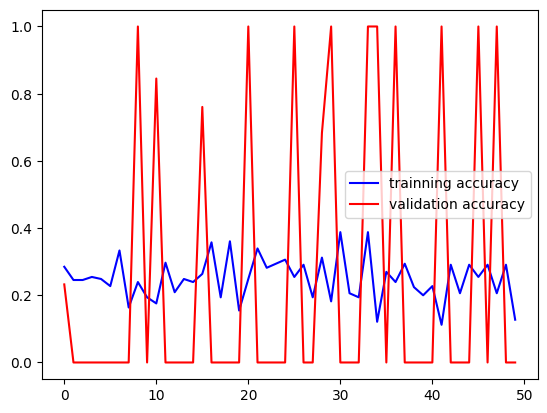

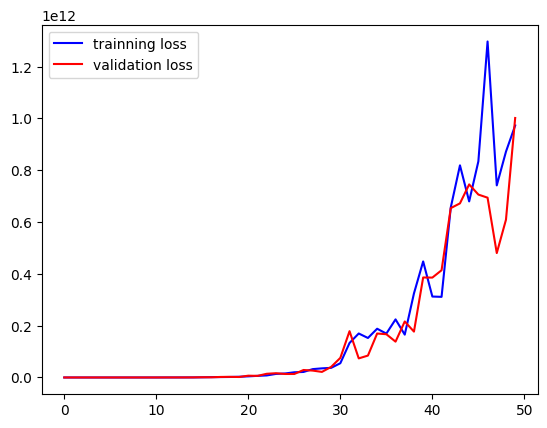

In [296]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [297]:
prediction = model.predict(X_test)

5/5 [==============================] - 6s 1s/step


In [299]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: in user code:

    File "C:\Users\perei\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\perei\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\perei\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\perei\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1790, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\perei\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\perei\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\perei\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\perei\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\perei\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\perei\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 4) are incompatible


In [ ]:
model.save("prediction_yawn_no_yawn.h5")

In [300]:
model = Sequential()

model.add(Conv2D(256, (3, 3),activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(2, activation="sigmoid"))

# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate*10),#multiplicação arbitraria
#     loss = tf.keras.losses.BinaryFocalCrossentropy(),#função de custo otimizado quando a saida é binaria
#     metrics=['accuracy'] #metrica de acuaracia ou precisão
# )

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")



model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 71, 71, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 34, 34, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 16, 16, 64)     

In [301]:
initial_time = time.time()

history = model.fit(gen_train, epochs=50, validation_data=gen_test, shuffle=True)

final_time = time.time()

Epoch 1/50
11/11 [==============================] - 160s 14s/step - loss: 0.7127 - accuracy: 0.4485 - val_loss: 0.6640 - val_accuracy: 0.9155
Epoch 2/50
11/11 [==============================] - 120s 11s/step - loss: 0.6881 - accuracy: 0.4485 - val_loss: 0.6702 - val_accuracy: 0.7113
Epoch 3/50
11/11 [==============================] - 119s 11s/step - loss: 0.6841 - accuracy: 0.4606 - val_loss: 0.5986 - val_accuracy: 0.5634
Epoch 4/50
11/11 [==============================] - 137s 13s/step - loss: 0.6092 - accuracy: 0.5000 - val_loss: 0.5005 - val_accuracy: 0.6549
Epoch 5/50
11/11 [==============================] - 129s 11s/step - loss: 0.5675 - accuracy: 0.5970 - val_loss: 0.4841 - val_accuracy: 0.7042
Epoch 6/50
11/11 [==============================] - 130s 12s/step - loss: 0.5592 - accuracy: 0.5818 - val_loss: 0.4811 - val_accuracy: 0.6831
Epoch 7/50
11/11 [==============================] - 120s 11s/step - loss: 0.5301 - accuracy: 0.6030 - val_loss: 0.4457 - val_accuracy: 0.5493
Epoch 

In [302]:
total_time = final_time - initial_time
print(f"Tempo total de treinamento: {(total_time/60)/60} horas")

Tempo total de treinamento: 1.69450252380636 horas


In [303]:
prediction = model.predict(X_test)

5/5 [==============================] - 5s 1s/step


In [304]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 37.74665832519531
Test accuracy: 0.4225352108478546


In [305]:
model.save("prediction_yawn_no_yawn.h5")